In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import pprint as pprint
from scipy.stats import linregress
# this tells Jupyter to embed matplotlib plots in the notebook
%matplotlib inline

In [5]:
df = pd.read_csv('./summerOly_medal_counts.csv')
df['NOC'] = df['NOC'].str.replace('\xa0', '', regex=True)

In [6]:
df.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [7]:
unique_values = df['NOC'].unique()

print(unique_values) 

['United States' 'Greece' 'Germany' 'France' 'Great Britain' 'Hungary'
 'Austria' 'Australia' 'Denmark' 'Switzerland' 'Mixed team' 'Belgium'
 'Italy' 'Cuba' 'Canada' 'Spain' 'Luxembourg' 'Norway' 'Netherlands'
 'India' 'Bohemia' 'Sweden' 'Australasia' 'Russian Empire' 'Finland'
 'South Africa' 'Estonia' 'Brazil' 'Japan' 'Czechoslovakia' 'New Zealand'
 'Yugoslavia' 'Argentina' 'Uruguay' 'Poland' 'Haiti' 'Portugal' 'Romania'
 'Egypt' 'Ireland' 'Chile' 'Philippines' 'Mexico' 'Latvia' 'Turkey'
 'Jamaica' 'Peru' 'Ceylon' 'Trinidad and Tobago' 'Panama' 'South Korea'
 'Iran' 'Puerto Rico' 'Soviet Union' 'Lebanon' 'Bulgaria' 'Venezuela'
 'United Team of Germany' 'Iceland' 'Pakistan' 'Bahamas' 'Ethiopia'
 'Formosa' 'Ghana' 'Morocco' 'Singapore' 'British West Indies' 'Iraq'
 'Tunisia' 'Kenya' 'Nigeria' 'East Germany' 'West Germany' 'Mongolia'
 'Uganda' 'Cameroon' 'Taiwan' 'North Korea' 'Colombia' 'Niger' 'Bermuda'
 'Thailand' 'Zimbabwe' 'Tanzania' 'Guyana' 'China' 'Ivory Coast' 'Syria'
 'Algeria

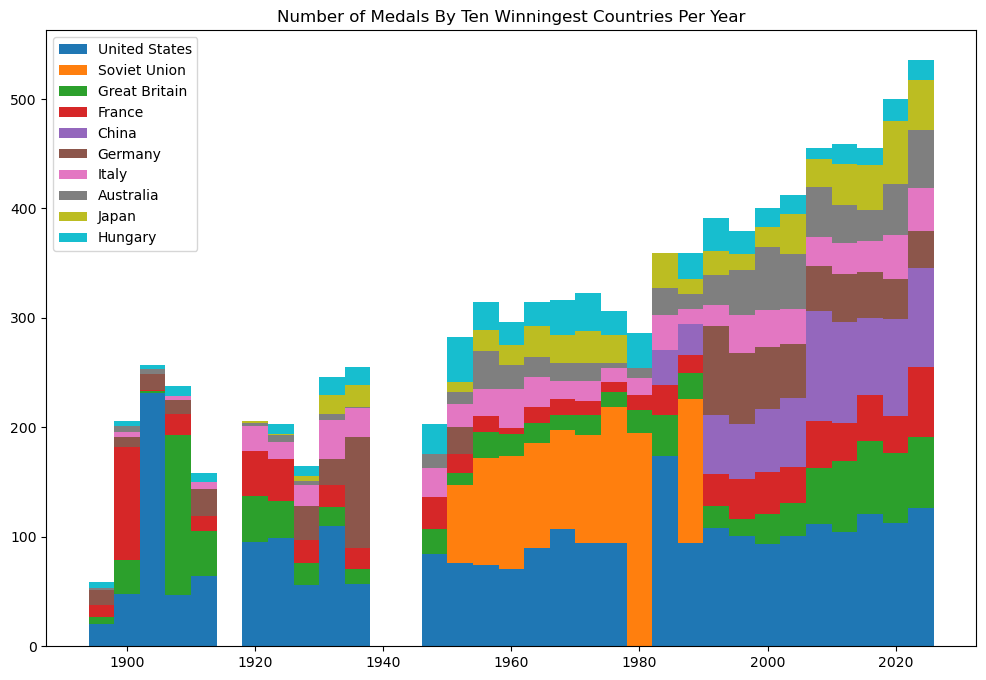

In [8]:
#stacked histogram
countries = df['NOC'].unique()  # Unique countries
years = sorted(df['Year'].unique())  # Unique years

medals = {country: [] for country in countries}
for year in years:
    year_data = df[df['Year'] == year]
    total_medals = year_data['Total'].sum()
    for country in countries:
        country_medals = year_data[year_data['NOC'] == country]['Total'].sum()
        medals[country].append(country_medals if total_medals > 0 else 0)

# Calculate total medals for each country across all years
total_medals_by_country = {country: sum(medals[country]) for country in medals.keys()}

n=10
# Get the top n countries based on total medals
top_n_countries = sorted(total_medals_by_country, key=total_medals_by_country.get, reverse=True)[:n]

# Filter the medals dictionary to include only the top n countries
filtered_medals = {country: medals[country] for country in top_n_countries}
#print(medals)

fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(len(years))

for boolean, medal in filtered_medals.items():
    p = ax.bar(years, medal, 4, label=boolean, bottom=bottom)
    bottom += medal
    
ax.set_title("Number of Medals By Ten Winningest Countries Per Year")
ax.legend(loc="upper left")

plt.show()

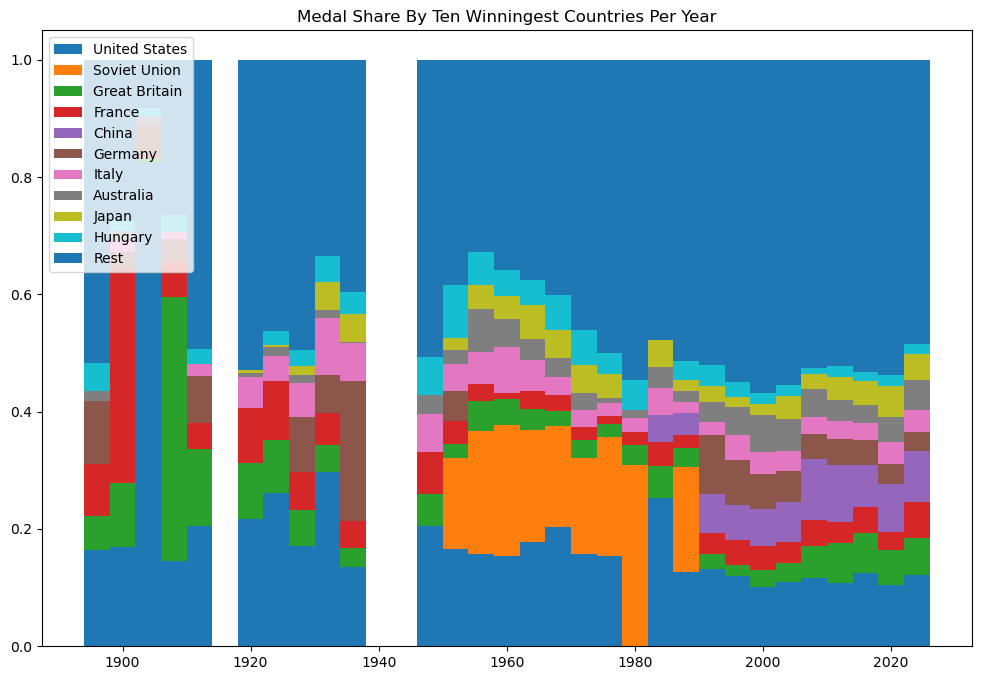

In [9]:
# Calculate total medals for each country across all years
medalshares = {country: [] for country in countries}
for year in years:
    year_data = df[df['Year'] == year]
    total_medals = year_data['Total'].sum()
    for country in countries:
        country_medals = year_data[year_data['NOC'] == country]['Total'].sum()
        medalshares[country].append(country_medals / total_medals if total_medals > 0 else 0)

total_medals_by_country = {country: sum(medals[country]) for country in medals.keys()}

n=10
# Get the top n countries based on total medals
top_n_countries = sorted(total_medals_by_country, key=total_medals_by_country.get, reverse=True)[:n]

# Filter the medals dictionary to include only the top n countries
# Add the "Rest" category
filtered_medalshares = {country: medalshares[country] for country in top_n_countries}
rest_shares = [0] * len(years)
for country in countries:
    if country not in top_n_countries:
        rest_shares = [r + m for r, m in zip(rest_shares, medalshares[country])]
filtered_medalshares["Rest"] = rest_shares

fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(len(years))

for boolean, medal_s in filtered_medalshares.items():
    p = ax.bar(years, medal_s, 4, label=boolean, bottom=bottom)
    bottom += medal_s
    
ax.set_title("Medal Share By Ten Winningest Countries Per Year")
ax.legend(loc="upper left")

plt.show()

In [10]:
pivot_data = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)

In [11]:
print(pivot_data.head())
pivot_data.columns

NOC   Afghanistan  Albania  Algeria  Argentina  Armenia  Australasia  \
Year                                                                   
1896            0        0        0          0        0            0   
1900            0        0        0          0        0            0   
1904            0        0        0          0        0            0   
1908            0        0        0          0        0            5   
1912            0        0        0          0        0            7   

NOC   Australia  Austria  Azerbaijan  Bahamas  ...  United Team of Germany  \
Year                                           ...                           
1896          2        5           0        0  ...                       0   
1900          5        6           0        0  ...                       0   
1904          4        3           0        0  ...                       0   
1908          0        1           0        0  ...                       0   
1912          0        4   

Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australasia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'United Team of Germany', 'Uruguay', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'Virgin Islands', 'West Germany', 'Yugoslavia', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='NOC', length=164)

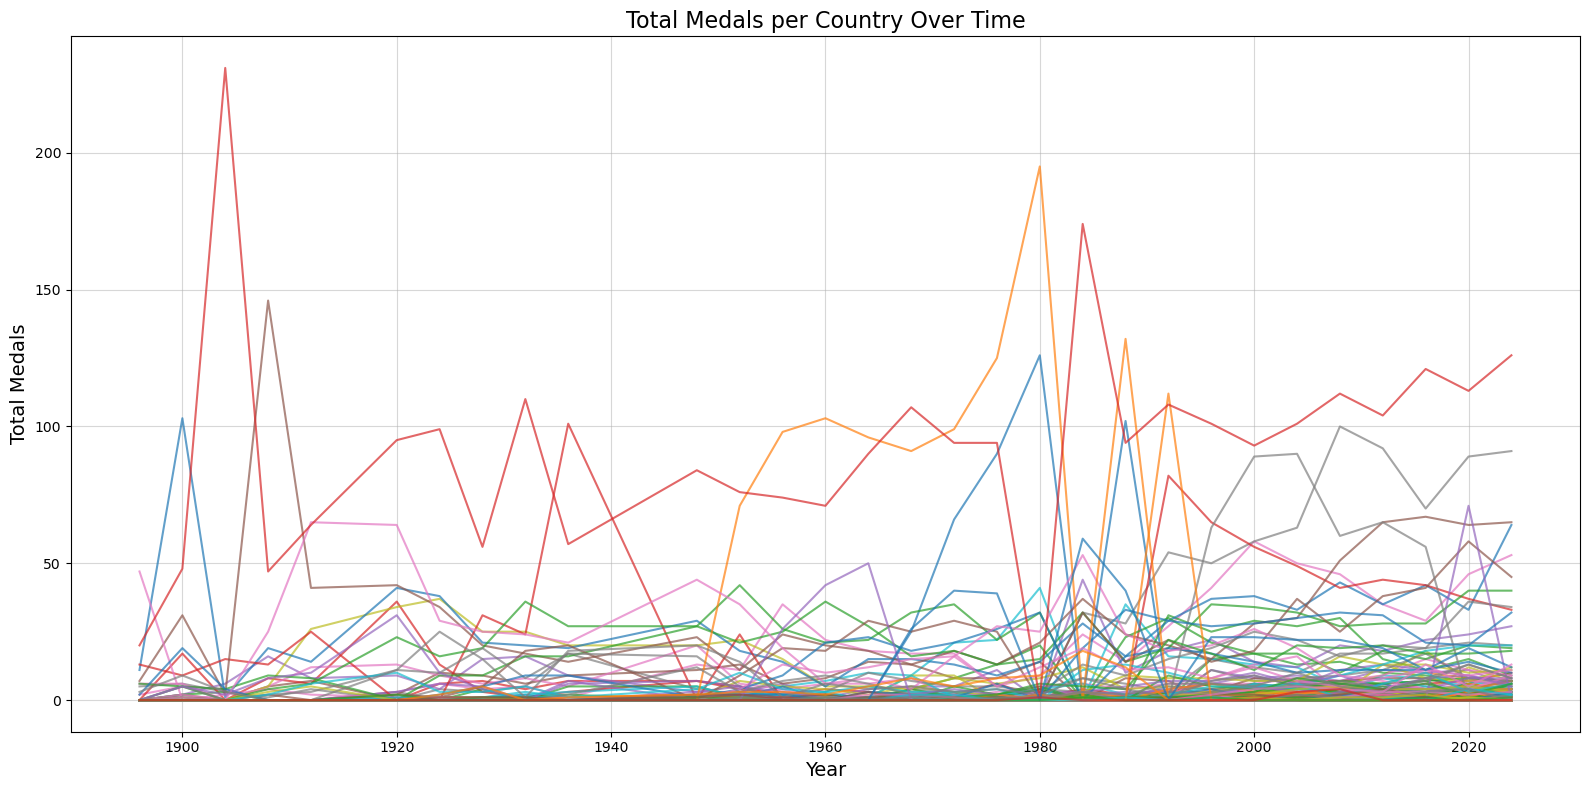

In [12]:
# each country's total medals over time on the same graph
pivot_data.plot(figsize=(16, 8), legend=False, alpha=0.7)
plt.title("Total Medals per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)
plt.grid(alpha=0.5)

# legend outside the plot
#plt.legend(pivot_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

In [261]:
pivot_data

NOC,AFG,AHO,ALB,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1984,0,0,0,2,0,0,0,24,3,0,...,0,0,0,174,0,3,0,18,1,0
1988,0,1,0,0,0,2,0,14,1,0,...,0,132,0,94,0,0,0,12,0,0
1992,0,0,0,2,0,1,0,27,2,0,...,0,0,0,108,0,0,0,0,0,0
1996,0,0,0,3,0,3,2,41,3,1,...,23,0,0,101,2,0,0,0,1,0
2000,0,0,0,5,0,4,1,58,3,3,...,23,0,1,93,4,0,1,0,0,0
2004,0,0,0,0,0,6,0,50,7,5,...,22,0,0,101,5,2,0,0,0,3
2008,1,0,0,2,0,6,5,46,3,6,...,22,0,0,112,4,1,1,0,0,4
2012,1,0,0,1,0,4,2,35,0,9,...,19,0,0,104,3,1,1,0,0,0
2016,0,0,0,2,0,4,4,29,1,18,...,11,0,0,121,13,3,2,0,0,0


([], [])

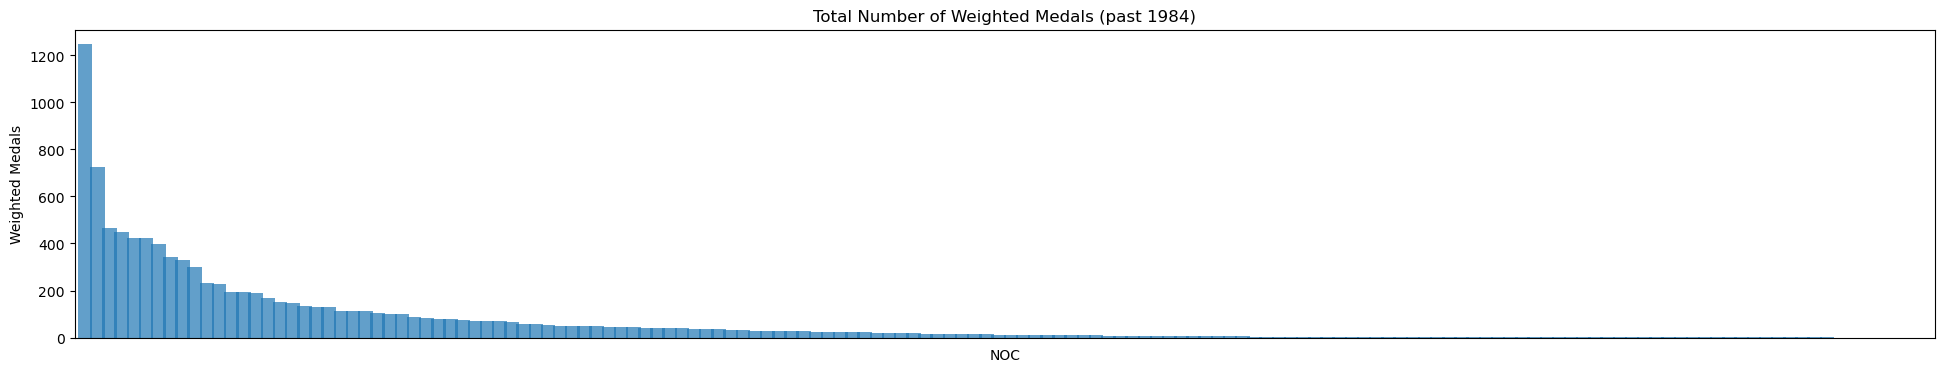

In [271]:
total_medals = pivot_data.sum(axis=0).sort_values(ascending=False)
plt.title('Total Number of Weighted Medals (past 1984)')
plt.ylabel('Weighted Medals')
total_medals.plot(kind='bar', figsize=(24, 4), legend=False, alpha=0.7, width =1.2)
plt.xticks([])

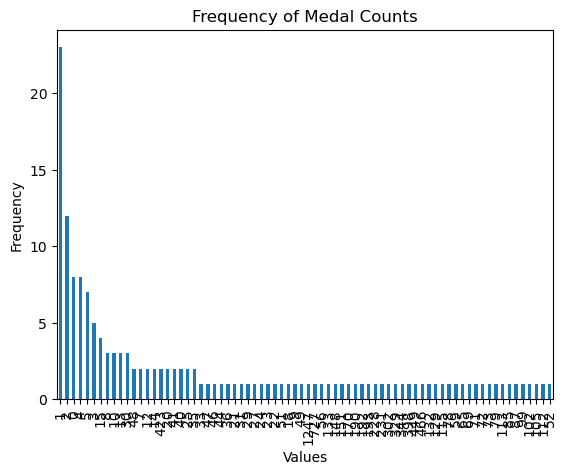

In [275]:
value_counts = total_medals.value_counts()

# Plot the frequencies as a bar chart
value_counts.plot(kind='bar')

# Optionally, customize the plot
plt.title('Frequency of Medal Counts')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Show the plot
plt.show()

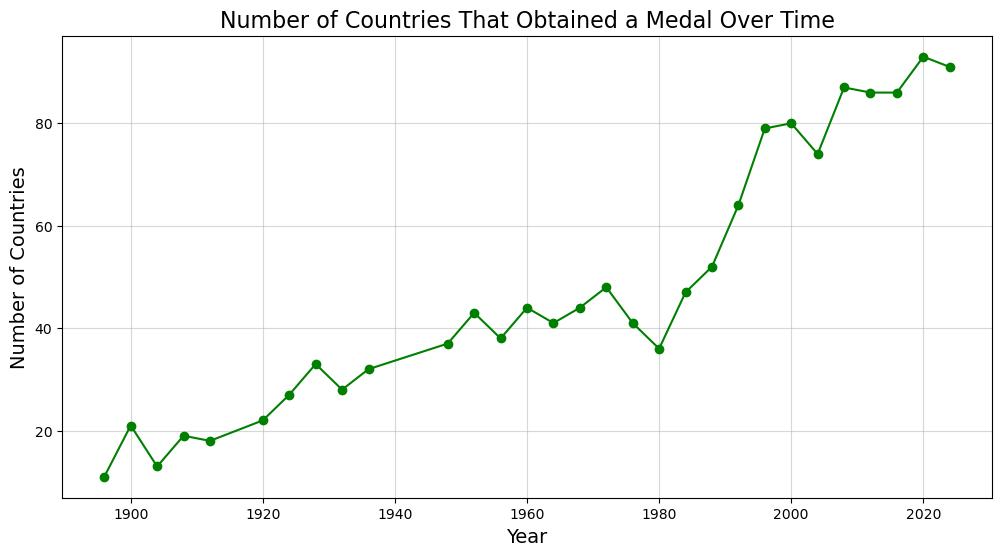

In [13]:
# Calculate the number of unique countries (NOC) with at least one medal per year
countries_with_medals = df[df["Total"] > 0].groupby("Year")["NOC"].nunique()

# Plot the data
plt.figure(figsize=(12, 6))
countries_with_medals.plot(marker="o", color="green")
plt.title("Number of Countries That Obtained a Medal Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [350]:
athletes = pd.read_csv('./summerOly_athletes.csv')
athletes.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


                    Name Sex            Team  NOC  Year         City  \
0              A Dijiang   M           China  CHN  1992    Barcelona   
1               A Lamusi   M           China  CHN  2012       London   
2            Gunnar Aaby   M         Denmark  DEN  1920    Antwerpen   
3            Edgar Aabye   M  Denmark/Sweden  DEN  1900        Paris   
4  Cornelia (-strannood)   F     Netherlands  NED  1932  Los Angeles   

        Sport                         Event     Medal  
0  Basketball   Basketball Men's Basketball  No medal  
1        Judo  Judo Men's Extra-Lightweight  No medal  
2    Football       Football Men's Football  No medal  
3  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4   Athletics  Athletics Women's 100 metres  No medal  
                    Name Sex            Team  NOC  Year         City  \
0              A Dijiang   M           China  CHN  1992    Barcelona   
1               A Lamusi   M           China  CHN  2012       London   
2            Gu

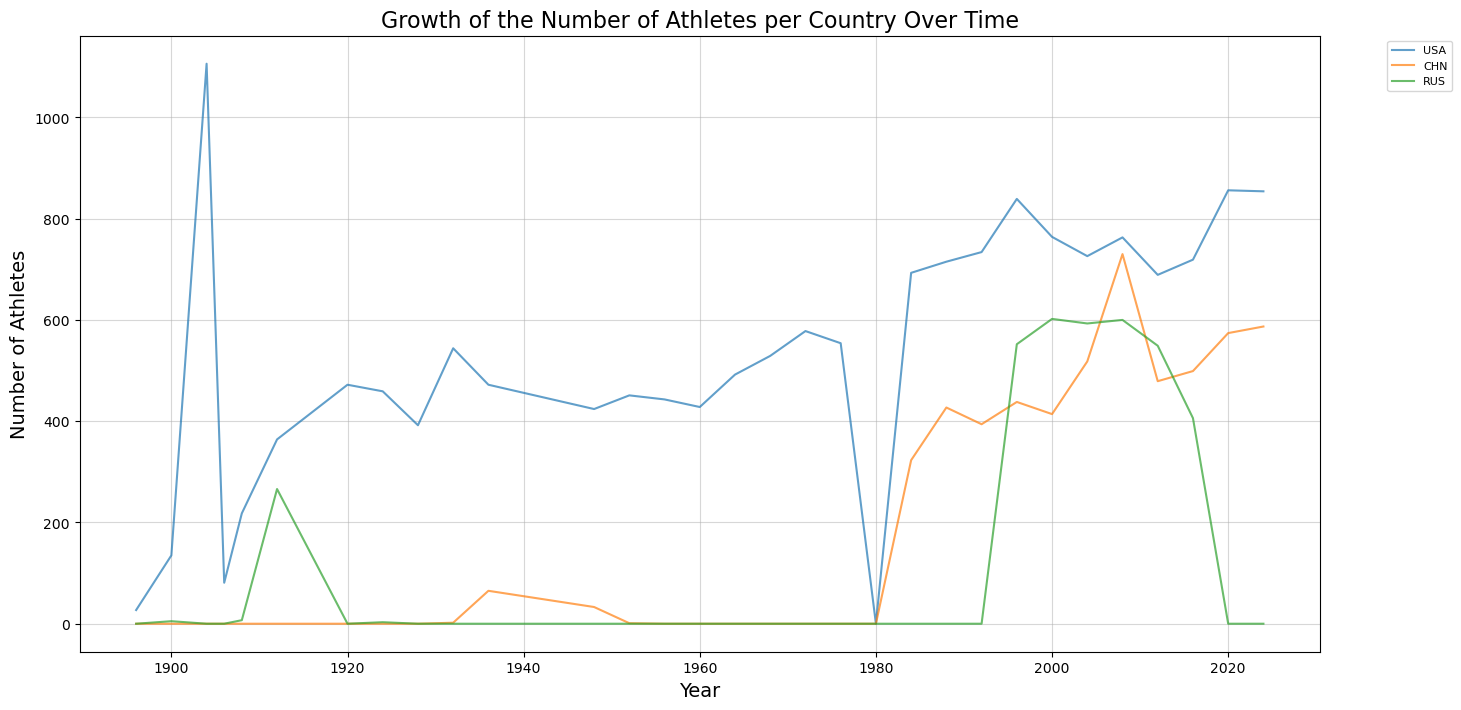

In [351]:
print(athletes.head())
athletes_data = athletes.drop_duplicates()
print(athletes.head())
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
athlete_pivot_data = athlete_counts.pivot(index='Year', columns='NOC', values='Athlete_Count').fillna(0)

# Plot each country's line
countries_of_interest = ['USA', 'CHN', 'RUS']
athlete_pivot_data[countries_of_interest].plot(figsize=(16, 8), legend=False, alpha=0.7)

pivot_data_smoothed = athlete_pivot_data.rolling(window=3, min_periods=1).mean()
#pivot_data_smoothed[countries_of_interest].plot(figsize=(16, 8), legend=False, alpha=0.7)

# Add title and labels
plt.title("Growth of the Number of Athletes per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Athletes", fontsize=14)
plt.grid(alpha=0.5)

# Optionally, add a legend
plt.legend(countries_of_interest, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
#plt.tight_layout()
plt.show()

In [302]:
athlete_counts

,Year,NOC,Athlete_Count
0,1896,AUS,5
1,1896,AUT,8
2,1896,DEN,15
3,1896,FRA,26
4,1896,GBR,25
...,...,...,...
3217,2024,VIE,20
3218,2024,VIN,4
3219,2024,YEM,4
3220,2024,ZAM,32


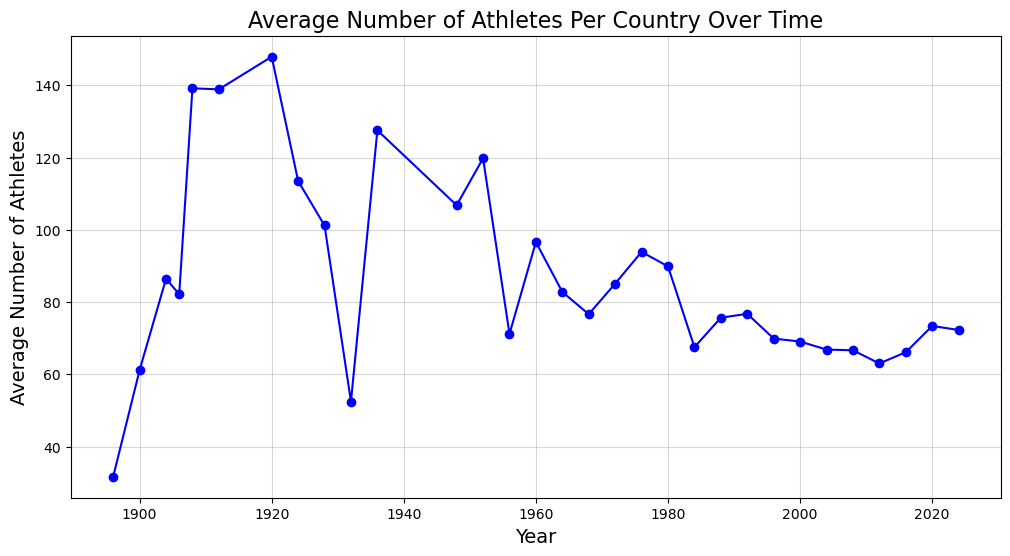

In [16]:
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
avg_athletes_per_country = athlete_counts.groupby('Year')['Athlete_Count'].mean()

plt.figure(figsize=(12, 6))
avg_athletes_per_country.plot(marker='o', color='blue')
plt.title("Average Number of Athletes Per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Number of Athletes", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

SPORT SPECIALIZATION DATA ANALYSIS:

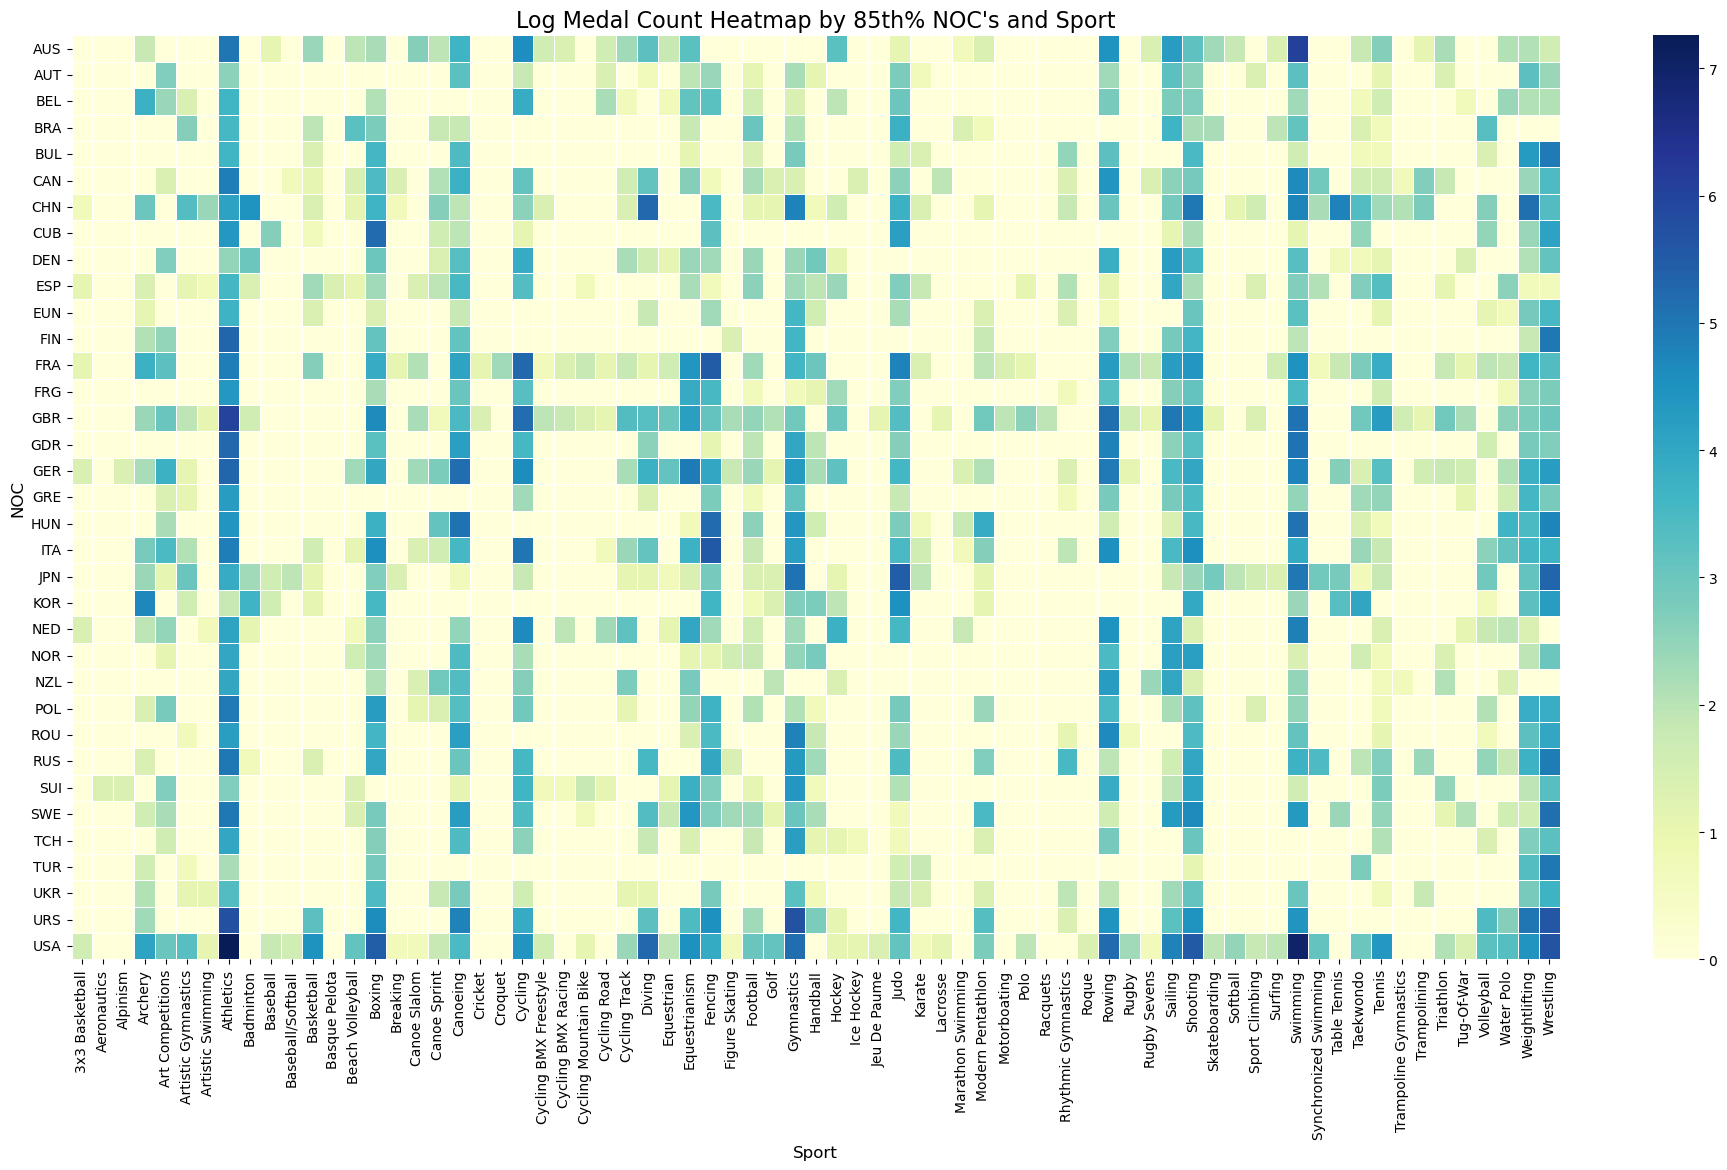

In [176]:
buffer = athletes_data.copy()
buffer['NOC'] = buffer['NOC'].str.replace('\xa0', '', regex=True)
buffer["Medal"] = buffer["Medal"].str.replace('\xa0', '', regex=True)
buffer['Sport'] = buffer['Sport'].str.split(',', n=1).str[0]

# weight gold, silver, and bronze medals accordingly
medal_mapping = {
    "No medal": 0,
    "Bronze": 1,
    "Silver": 2,
    "Gold": 3
}

buffer["Medal"] = buffer["Medal"].replace(medal_mapping)
collapsed_data = buffer.groupby(['NOC', 'Year', 'Sport', 'Event'], as_index=False)["Medal"].max()
#print(collapsed_data["Medal"].describe())

total_medals_by_noc = collapsed_data.groupby('NOC')['Medal'].sum()
#print(total_medals_by_noc.describe())
q3_cutoff = total_medals_by_noc.quantile(0.85)
top_countries = total_medals_by_noc[total_medals_by_noc >= q3_cutoff].index
medals_table = collapsed_data.groupby(['NOC', 'Sport'])['Medal'].sum().reset_index()
filtered_medals_table = medals_table[medals_table['NOC'].isin(top_countries)]

#print(buffer["Medal"].unique())

pivot_table = filtered_medals_table.pivot(index='NOC', columns='Sport', values='Medal').fillna(0)
#pivot_table
log_pivot_table = np.log1p(pivot_table)
plt.figure(figsize=(24, 12))  # Adjust the size if needed
sns.heatmap(log_pivot_table, cmap='YlGnBu', fmt='g', linewidths=0.5)

# Add labels and title
plt.title('Log Medal Count Heatmap by 85th% NOC\'s and Sport', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('NOC', fontsize=12)

# Show the heatmap
plt.show()

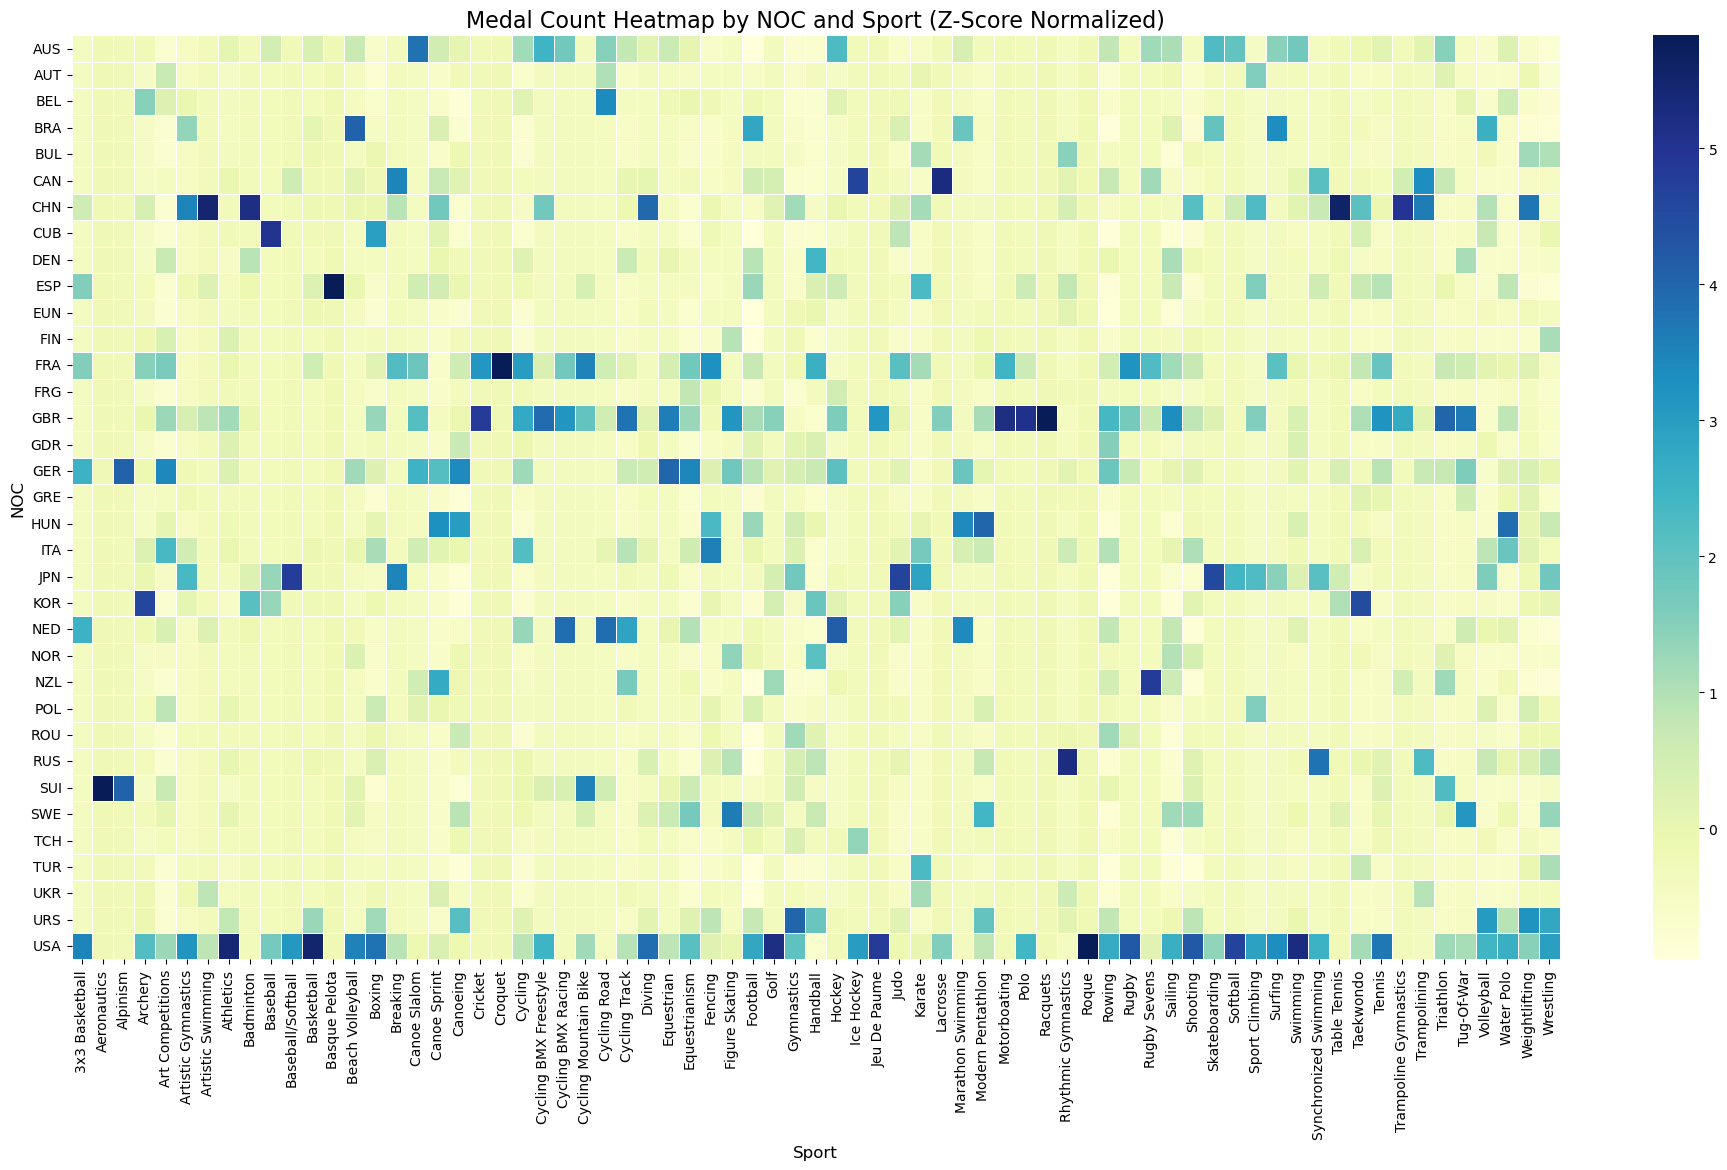

In [177]:
from scipy.stats import zscore
# Normalize using z-scores
z_pivot_table = pivot_table.apply(zscore)

# Create the heatmap with z-scored data
plt.figure(figsize=(24, 12))
sns.heatmap(z_pivot_table, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Medal Count Heatmap by NOC and Sport (Z-Score Normalized)', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('NOC', fontsize=12)

# Show the heatmap
plt.show()

Exploring Sport Clusters

C:\Users\conno\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


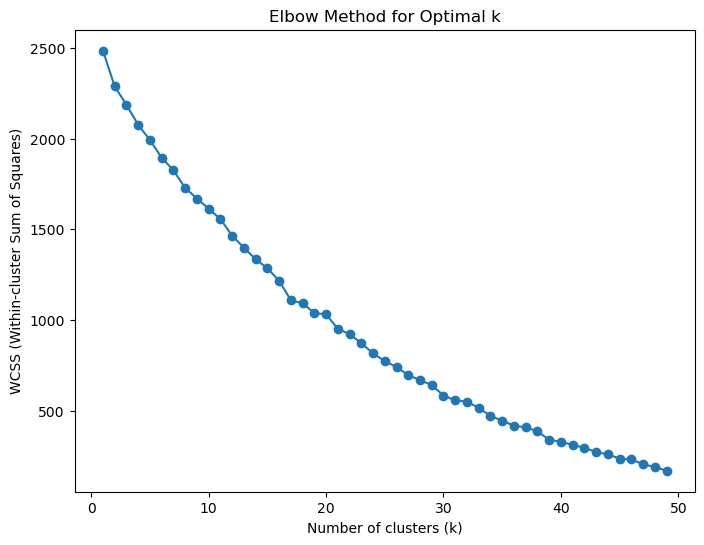

{0: ['Canoeing', 'Gymnastics', 'Rowing'],
 1: ['Figure Skating', 'Sailing', 'Shooting'],
 2: ['Aeronautics',
     'Alpinism',
     'Basque Pelota',
     'Cricket',
     'Croquet',
     'Cycling BMX Freestyle',
     'Cycling Mountain Bike',
     'Motorboating',
     'Polo',
     'Racquets',
     'Rugby',
     'Tennis',
     'Triathlon',
     'Tug-Of-War'],
 3: ['Karate'],
 4: ['Artistic Swimming',
     'Badminton',
     'Diving',
     'Table Tennis',
     'Trampoline Gymnastics',
     'Trampolining',
     'Weightlifting'],
 5: ['3x3 Basketball',
     'Canoe Slalom',
     'Canoe Sprint',
     'Cycling',
     'Cycling BMX Racing',
     'Cycling Track',
     'Equestrian',
     'Equestrianism',
     'Hockey',
     'Marathon Swimming'],
 6: ['Art Competitions', 'Sport Climbing'],
 7: ['Rhythmic Gymnastics'],
 8: ['Athletics',
     'Baseball/Softball',
     'Basketball',
     'Breaking',
     'Golf',
     'Ice Hockey',
     'Jeu De Paume',
     'Lacrosse',
     'Roque',
     'Rugby Sevens',
 

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

q3_cutoff = total_medals_by_noc.quantile(0.85)
top_countries = total_medals_by_noc[total_medals_by_noc >= q3_cutoff].index
medals_table = collapsed_data.groupby(['NOC', 'Sport'])['Medal'].sum().reset_index()
filtered_medals_table = medals_table[medals_table['NOC'].isin(top_countries)]

#print(buffer["Medal"].unique())

pivot_table = filtered_medals_table.pivot(index='NOC', columns='Sport', values='Medal').fillna(0)
#pivot_table
log_pivot_table = np.log1p(pivot_table)

# Assuming pivot_table is the matrix with NOCs as rows and sports as columns
# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(z_pivot_table.T)  # Transpose to make sports as rows

# Perform k-means clustering
kmeans = KMeans(n_clusters=17, random_state=42)  # Change n_clusters to the number of clusters you want
sports_clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the sports names
sports_clustered = pd.DataFrame({
    'Sport': log_pivot_table.columns,
    'Cluster': sports_clusters
})

# Assuming 'scaled_data' is your normalized data
wcss = []

# Try a range of cluster numbers (for example, from 1 to 10 clusters)
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)  # Fit the model
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances of samples to their closest cluster center

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

# View the sports and their assigned clusters
#print(sports_clustered.to_string())
inverted_clusters = sports_clustered.groupby('Cluster')['Sport'].apply(list).to_dict()

pprint.pprint(inverted_clusters)

Canberra Distance

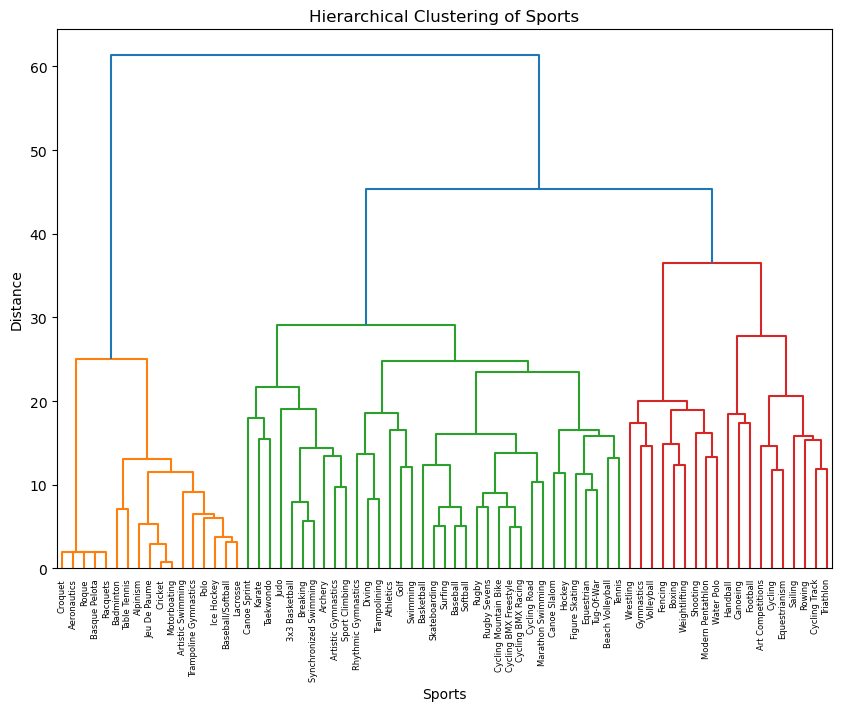

In [277]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
distance_matrix = pdist(z_pivot_table.T, metric='canberra')
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=z_pivot_table.T.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Sports")
plt.xlabel("Sports")
plt.ylabel("Distance")
plt.show()

In [282]:
pivot_table.T
proportion_table = pivot_table.T.div(pivot_table.T.sum(axis=0), axis=1)
proportion_table

NOC,AUS,AUT,BEL,BRA,BUL,CAN,CHN,CUB,DEN,ESP,...,POL,ROU,RUS,SUI,SWE,TCH,TUR,UKR,URS,USA
Sport,,,,,,,,,,,,,,,,,,,,,
3x3 Basketball,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000719,0.000000,0.000000,0.005556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000826
Aeronautics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alpinism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Archery,0.004496,0.000000,0.131661,0.000000,0.000000,0.000000,0.013669,0.000000,0.000000,0.008333,...,0.005455,0.000000,0.003468,0.000000,0.004246,0.000000,0.017544,0.025455,0.004762,0.011770
Art Competitions,0.000000,0.065116,0.031348,0.000000,0.000000,0.004808,0.000000,0.000000,0.033097,0.000000,...,0.029091,0.000000,0.000000,0.034483,0.008493,0.013937,0.000000,0.000000,0.000000,0.004130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,0.000000,0.000000,0.003135,0.000000,0.000000,0.000000,0.000000,0.000000,0.007092,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007431,0.000000,0.000000,0.000000,0.000000,0.000619
Volleyball,0.000000,0.000000,0.000000,0.088737,0.007092,0.000000,0.009353,0.023013,0.000000,0.000000,...,0.012727,0.001730,0.012717,0.000000,0.000000,0.010453,0.000000,0.000000,0.015873,0.005162
Water Polo,0.006295,0.000000,0.031348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.005780,0.000000,0.004246,0.000000,0.000000,0.000000,0.006878,0.005575


jensenshannon distance

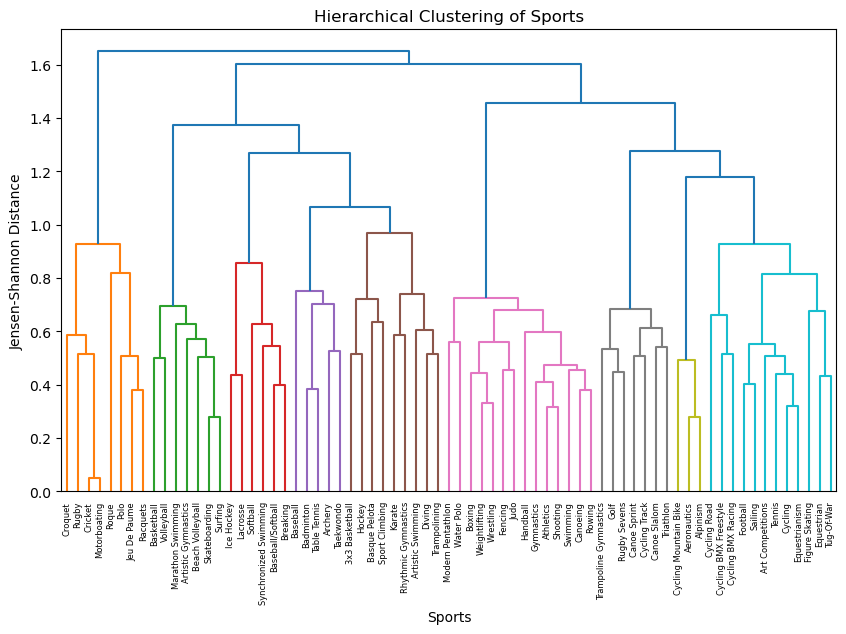

In [297]:
distance_matrix_js = pdist(proportion_table, metric='jensenshannon')
linkage_matrix_js = linkage(distance_matrix_js, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_js, labels=proportion_table.index, leaf_rotation=90, color_threshold=1)
plt.title("Hierarchical Clustering of Sports")
plt.xlabel("Sports")
plt.ylabel("Jensen-Shannon Distance")
plt.show()

threshold = 1  # You can change this value based on where you want to cut the dendrogram

clusters = fcluster(linkage_matrix_js, threshold, criterion='distance')
clusters_df = pd.DataFrame({
    'Sporta': proportion_table.index,
    'Cluster': clusters
})
#print(clusters_df['Cluster'].unique())
#print(clusters_df.to_string())


In [332]:
pivot_table.T

NOC,AUS,AUT,BEL,BRA,BUL,CAN,CHN,CUB,DEN,ESP,...,POL,ROU,RUS,SUI,SWE,TCH,TUR,UKR,URS,USA
Sport,,,,,,,,,,,,,,,,,,,,,
3x3 Basketball,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Aeronautics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Alpinism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Archery,5.0,0.0,42.0,0.0,0.0,0.0,19.0,0.0,0.0,3.0,...,3.0,0.0,3.0,0.0,4.0,0.0,4.0,7.0,9.0,57.0
Art Competitions,0.0,14.0,10.0,0.0,0.0,3.0,0.0,0.0,14.0,0.0,...,16.0,0.0,0.0,14.0,8.0,4.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0
Volleyball,0.0,0.0,0.0,26.0,3.0,0.0,13.0,11.0,0.0,0.0,...,7.0,1.0,11.0,0.0,0.0,3.0,0.0,0.0,30.0,25.0
Water Polo,7.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,13.0,27.0


In [336]:
pivot_trable = medals_table.pivot(index='NOC', columns='Sport', values='Medal').fillna(0)
pivot_table_transposed = pivot_trable.T.copy()

# Step 2: Merge the transposed pivot table with the clusters_df to associate each sport with a cluster
pivot_table_transposed['Sporta'] = pivot_table_transposed.index
merged_df = pd.merge(pivot_table_transposed, clusters_df, on='Sporta')

# Step 3: Group by 'Cluster' and aggregate the values
# You can change the aggregation function depending on your needs (e.g., sum, mean, etc.)
aggregated_clusters = merged_df.groupby('Cluster').agg('sum')  # Use 'mean' or other functions if needed

# Step 4: Display the aggregated clusters
acc = aggregated_clusters.loc[:, (aggregated_clusters != 0).any(axis=0)]
print(acc)

         AFG  AHO  AIN  ALB   ALG   ANZ   ARG   ARM    AUS    AUT  ...  \
Cluster                                                            ...   
1        0.0  0.0  0.0  0.0   0.0   3.0   6.0   0.0    0.0    0.0  ...   
2        0.0  0.0  0.0  0.0   3.0   0.0   6.0   3.0   29.0    0.0  ...   
3        0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0    5.0    0.0  ...   
4        2.0  0.0  0.0  0.0   0.0   0.0   3.0   0.0   12.0    0.0  ...   
5        0.0  0.0  0.0  0.0   0.0   0.0  12.0   0.0   51.0    5.0  ...   
6        0.0  0.0  3.0  2.0  35.0  16.0  80.0  35.0  757.0  151.0  ...   
7        0.0  0.0  5.0  0.0   0.0   0.0   1.0   0.0   39.0    3.0  ...   
8        0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0    0.0    0.0  ...   
9        0.0  2.0  2.0  0.0   0.0   1.0  43.0   0.0  219.0   56.0  ...   

            URS  URU     USA   UZB   VEN  VIE  WIF    YUG  ZAM   ZIM  
Cluster                                                               
1           0.0  0.0    21.0   0.0   0.0  0

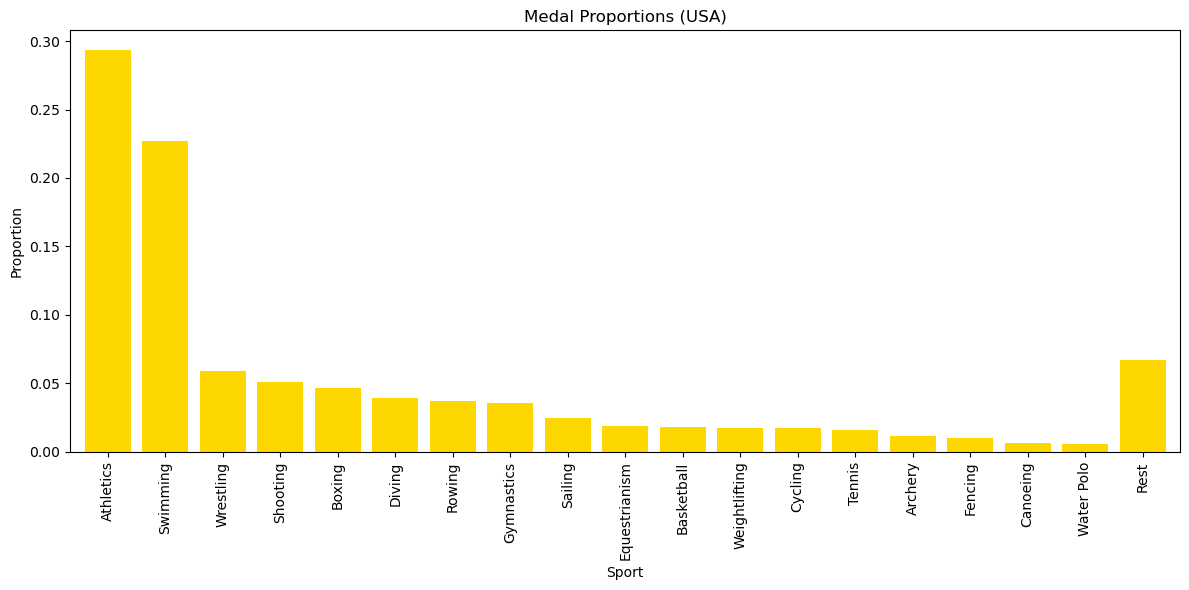

In [426]:
USA_proportions = proportion_table['USA'].sort_values(ascending=False)
threshold = USA_proportions.quantile(0.75)
rest_sum = USA_proportions[USA_proportions < threshold].sum()
USA_proportions = USA_proportions[USA_proportions >= threshold].append(pd.Series({'Rest': rest_sum}))

USA_proportions.plot(kind='bar', color='gold', figsize=(12, 6),width = 0.8)
plt.title('Medal Proportions (USA)')
plt.ylabel('Proportion')
plt.xlabel('Sport')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

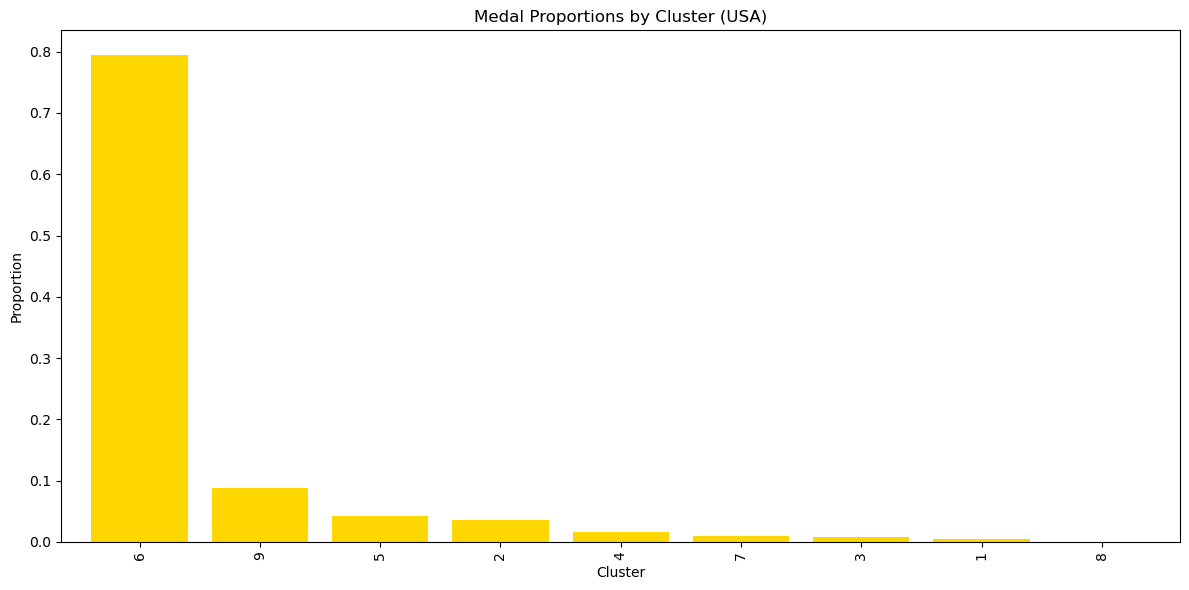

In [299]:
USA_cluster_proportions = aggregated_clusters['USA'].div(aggregated_clusters['USA'].sum()).sort_values(ascending=False)
USA_cluster_proportions.plot(kind='bar', color='gold', figsize=(12, 6),width = 0.8)
plt.title('Medal Proportions by Cluster (USA)')
plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

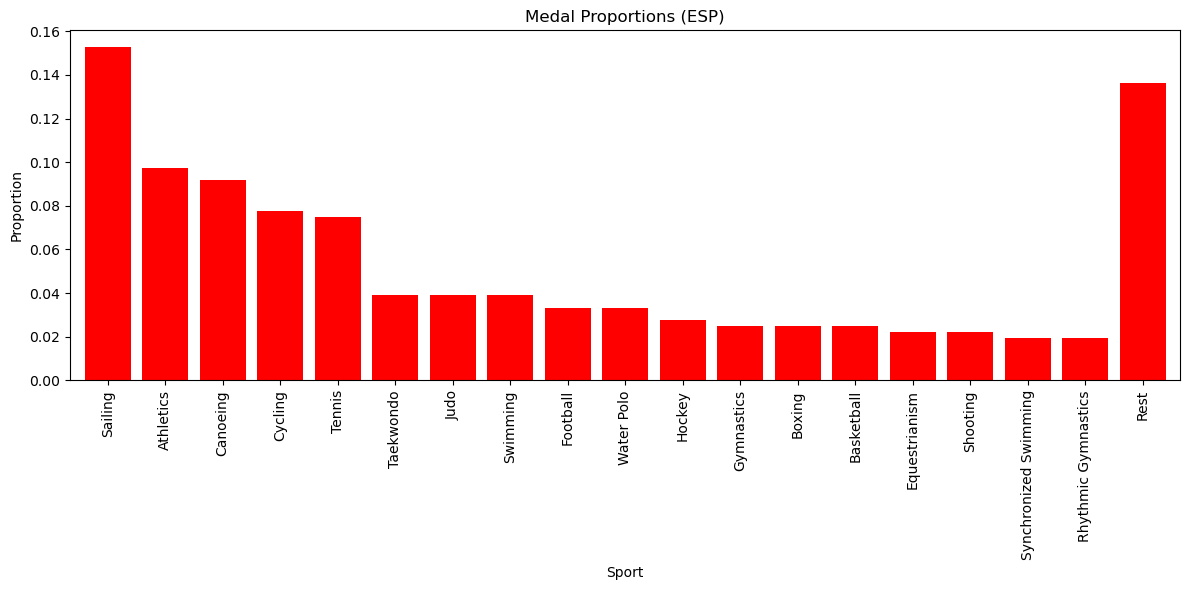

In [325]:
NOC = "ESP"
NOC_proportions = proportion_table[NOC].sort_values(ascending=False)
threshold = NOC_proportions.quantile(0.75)
rest_sum = NOC_proportions[NOC_proportions < threshold].sum()
NOC_proportions = NOC_proportions[NOC_proportions >= threshold].append(pd.Series({'Rest': rest_sum}))

NOC_proportions.plot(kind='bar', color='red', figsize=(12, 6),width = 0.8)
plt.title(f'Medal Proportions ({NOC})')
plt.ylabel('Proportion')
plt.xlabel('Sport')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

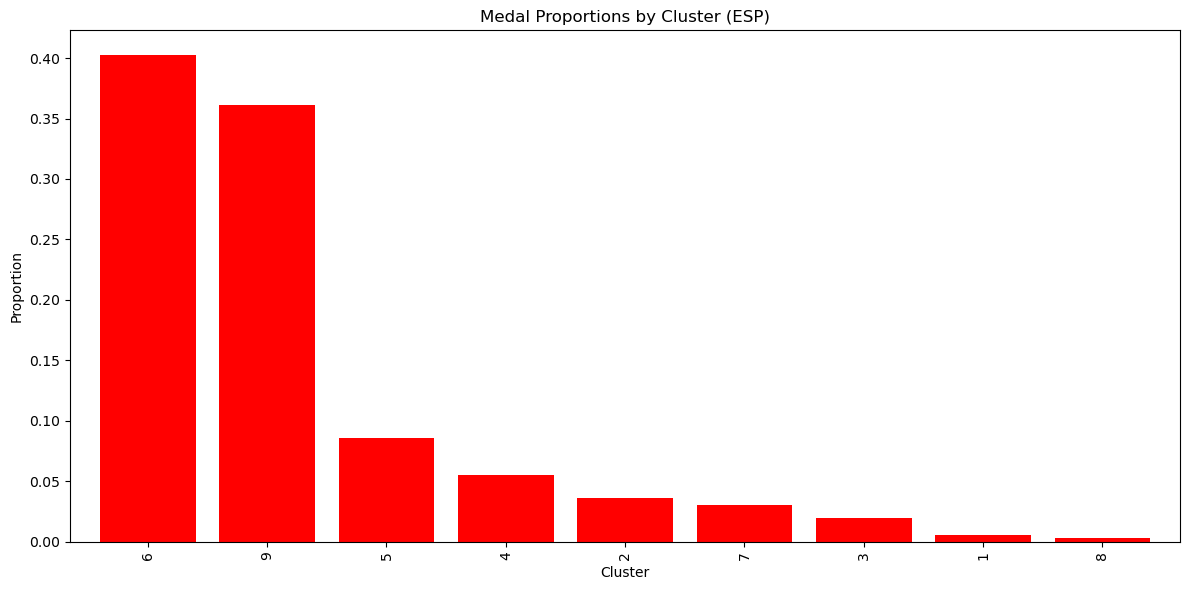

In [326]:
NOC_cluster_proportions = aggregated_clusters[NOC].div(aggregated_clusters[NOC].sum()).sort_values(ascending=False)

NOC_cluster_proportions.plot(kind='bar', color='red', figsize=(12, 6),width = 0.8)
plt.title(f'Medal Proportions by Cluster ({NOC})')
plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
distance_matrix = pdist(z_pivot_table, metric='cosine')  # Use 'correlation' as an alternative
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=z_pivot_table.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of NOC's")
plt.xlabel("NOC")
plt.ylabel("Distance")
plt.show()

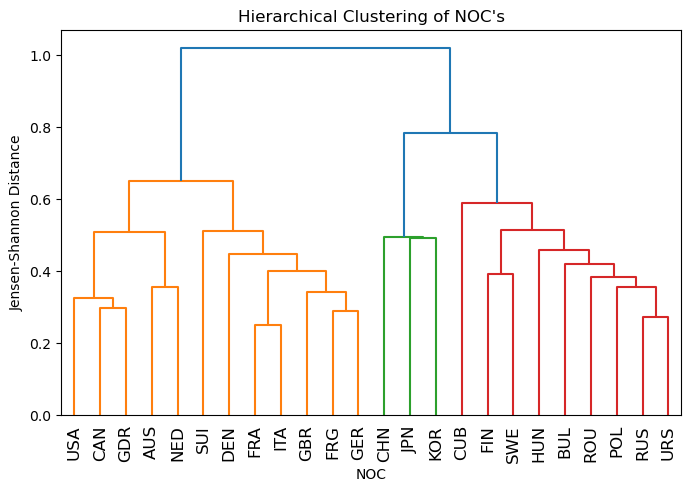

In [257]:
q3_cutoff = total_medals_by_noc.quantile(0.90)
top_countries = total_medals_by_noc[total_medals_by_noc >= q3_cutoff].index
medals_table = collapsed_data.groupby(['NOC', 'Sport'])['Medal'].sum().reset_index()
filtered_medals_table = medals_table[medals_table['NOC'].isin(top_countries)]


pivot_new = filtered_medals_table.pivot(index='NOC', columns='Sport', values='Medal').fillna(0)
NOC_proportion_table = pivot_new.div(pivot_new.sum(axis=1), axis=0)
#print(NOC_proportion_table)
all_nan = NOC_proportion_table[NOC_proportion_table.isna().all(axis=1)]
#print(all_nan)
NOC_proportion_table = NOC_proportion_table[~NOC_proportion_table.isna().all(axis=1)]
distance_matrix = pdist(NOC_proportion_table, metric='jensenshannon') 

linkage_matrix = linkage(distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, labels=NOC_proportion_table.index, leaf_rotation=90)
plt.xticks(fontsize=12)
plt.title("Hierarchical Clustering of NOC's")
plt.xlabel("NOC")
plt.ylabel("Jensen-Shannon Distance")
plt.show()

PAST PERFORMANCE EXPLORATION

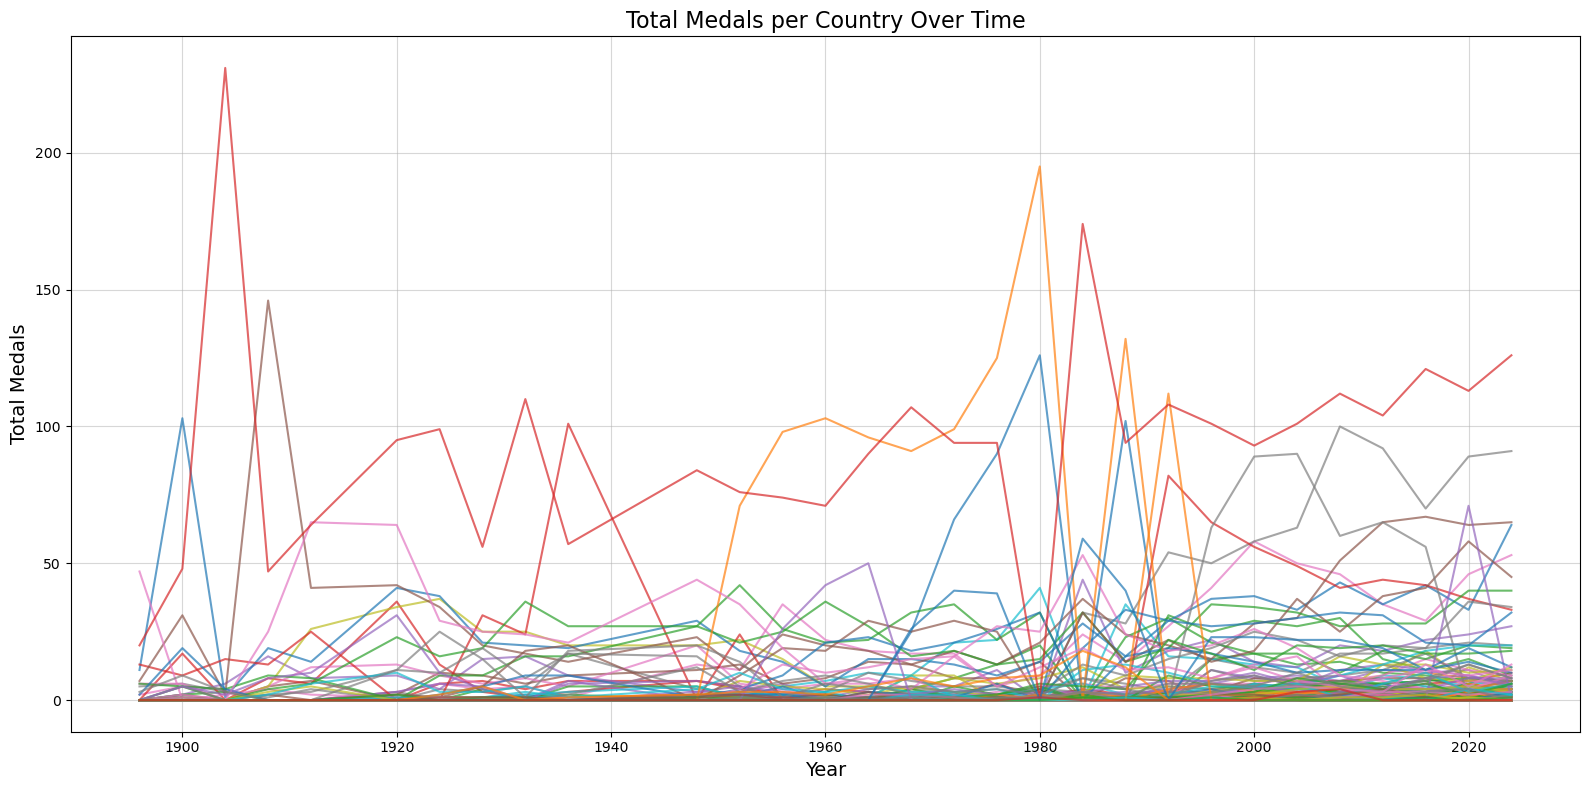

In [21]:
pivot_data = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)

# each country's total medals over time on the same graph
pivot_data.plot(figsize=(16, 8), legend=False, alpha=0.7)
plt.title("Total Medals per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)
plt.grid(alpha=0.5)

# legend outside the plot
#plt.legend(pivot_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

[0.000e+00 1.000e+00 1.200e+00 3.000e+00 5.000e+00 1.300e+01 2.500e+01
 4.310e+01 7.700e+01 1.681e+02 1.247e+03]
{0: Index(['ANZ', 'BOH', 'GUY', 'HAI', 'IRQ', 'LBN', 'LUX', 'TAN'], dtype='object', name='NOC'), 1: Index(['AHO', 'BAR', 'BER', 'BUR', 'CPV', 'DJI', 'DMA', 'EOR', 'ERI', 'GAB',
       'ISV', 'MNE', 'MRI', 'NIG', 'PAR', 'SAM', 'SEN', 'SRI', 'SUD', 'TGA',
       'TKM', 'TOG', 'URU'],
      dtype='object', name='NOC'), 2: Index(['AFG', 'ALB', 'BDI', 'CYP', 'GHA', 'LCA', 'MKD', 'MOZ', 'PAN', 'SCG',
       'SUR', 'UAE'],
      dtype='object', name='NOC'), 3: Index(['BOT', 'CRC', 'FIJ', 'GUA', 'ISL', 'JOR', 'KSA', 'KUW', 'PAK', 'PER',
       'SMR', 'SYR', 'ZAM'],
      dtype='object', name='NOC'), 4: Index(['BRN', 'CHI', 'CIV', 'CMR', 'ECU', 'GRN', 'KOS', 'MDA', 'NAM', 'PHI',
       'PUR', 'QAT', 'SGP', 'TJK', 'TTO', 'UGA', 'VIE', 'ZIM'],
      dtype='object', name='NOC'), 5: Index(['ALG', 'ARM', 'BAH', 'DOM', 'EGY', 'EST', 'HKG', 'ISR', 'KGZ', 'LAT',
       'MAS', 'MGL', 'POR', '

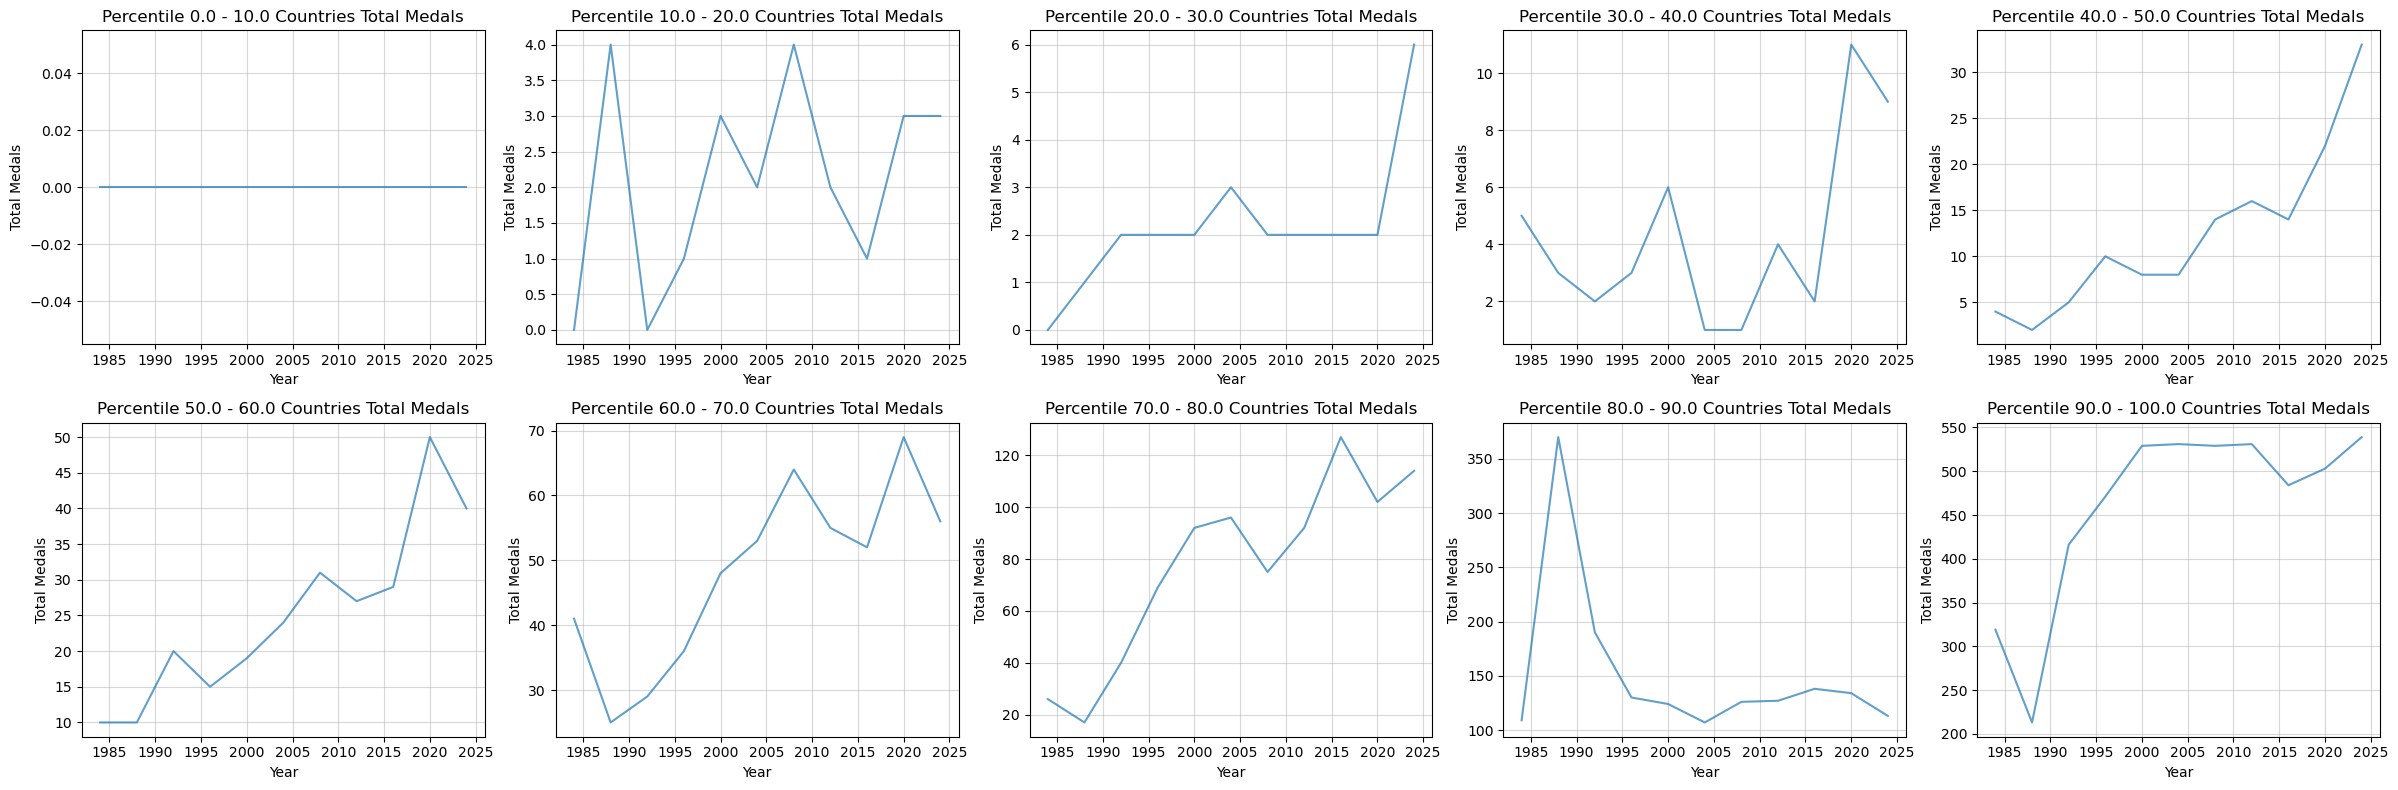

In [37]:
# Assuming 'df' is your dataframe with 'Year', 'NOC', and 'Total' columns
# Step 1: Create the pivot table to get the total medals for each country by year
team_to_noc = dict(zip(athletes_data['Team'], athletes_data['NOC']))
pivot_data = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)
matched_columns = [col for col in pivot_data.columns if col in team_to_noc]
pivot_data = pivot_data[matched_columns]
pivot_data = pivot_data.rename(columns=team_to_noc)
# Step 2: Calculate the total medals for each country
pivot_data = pivot_data[pivot_data.index >= 1984]
pivot_data = pivot_data.groupby(level=0, axis=1).sum()
total_medals = pivot_data.sum(axis=0)
#print(total_medals.to_string())
groups = 10
percentiles = np.percentile(total_medals, np.linspace(0, 100, groups+1))
print(percentiles)
# Step 4: Create a dictionary to store the countries for each percentile
percentile_groups = {i: total_medals[(total_medals >= percentiles[i]) & (total_medals < percentiles[i + 1])].index
                     for i in range(groups)}
#percentile_groups[groups-1] = percentile_groups[groups-1].append(pd.Index(["USA"]))
print(percentile_groups)

# Step 5: Plot the data
fig, axes = plt.subplots(2, 5, figsize=(24, 8)) 
axes = axes.flatten()  # Flatten to easily iterate over each subplot

# Loop over each percentile group and create a subplot
for i, (percentile, countries) in enumerate(percentile_groups.items()):
    ax = axes[i]
    # Filter the pivot_data for the countries in this percentile group
    subset = pivot_data[countries]
    total_medals_by_year = subset.sum(axis=1)
    # Plot each country's data
    total_medals_by_year.plot(ax=ax, legend=False, alpha=0.7)
    ax.set_title(f"Percentile {round(i*100/groups, 2)} - {round((i+1)*100/groups,2)} Countries Total Medals", fontsize=12)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Total Medals", fontsize=10)
    ax.grid(alpha=0.5)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


Index(['AFG', 'AHO', 'AIN', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG',
       ...
       'VIE', 'VIN', 'VNM', 'WIF', 'YAR', 'YEM', 'YMD', 'YUG', 'ZAM', 'ZIM'],
      dtype='object', name='NOC', length=234)


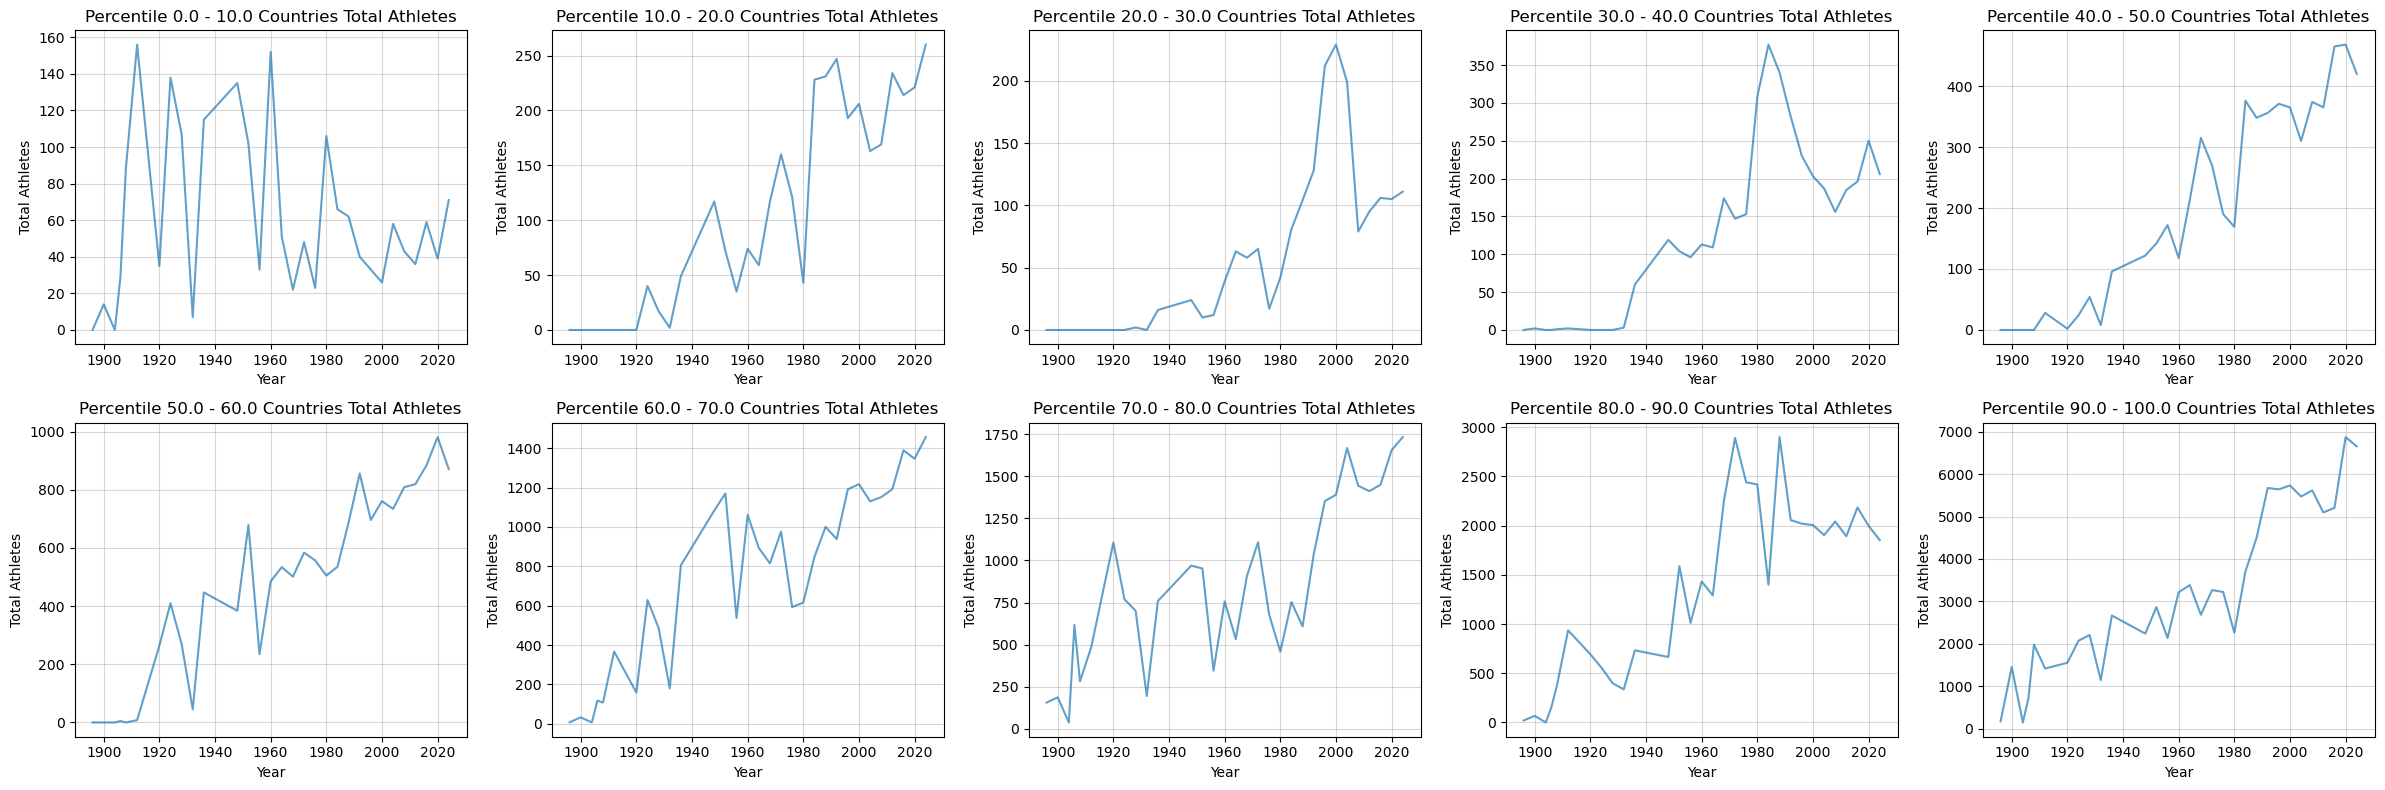

In [35]:
#filtered_data = athletes_data[athletes_data['Year'] >= 1984]
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
athlete_pivot = athlete_counts.pivot(index='Year', columns='NOC', values='Athlete_Count',)
athlete_pivot = athlete_pivot.fillna(0)

print(athlete_pivot.columns)

fig, axes = plt.subplots(2, 5, figsize=(24, 8)) 
axes = axes.flatten()  # Flatten to easily iterate over each subplot

for i, (percentile, countries) in enumerate(percentile_groups.items()):
    ax = axes[i]
    # Filter the pivot_data for the countries in this percentile group
    valid_countries = [country for country in countries if country in athlete_pivot.columns]

    if not valid_countries:
        # If no valid countries are left, skip this iteration
        continue
        
    subset = athlete_pivot[valid_countries]
    total_athletes = subset.sum(axis=1)
    # Plot each country's data
    total_athletes.plot(ax=ax, legend=False, alpha=0.7)
    ax.set_title(f"Percentile {round(i*100/groups, 2)} - {round((i+1)*100/groups,2)} Countries Total Athletes", fontsize=12)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Total Athletes", fontsize=10)
    ax.grid(alpha=0.5)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


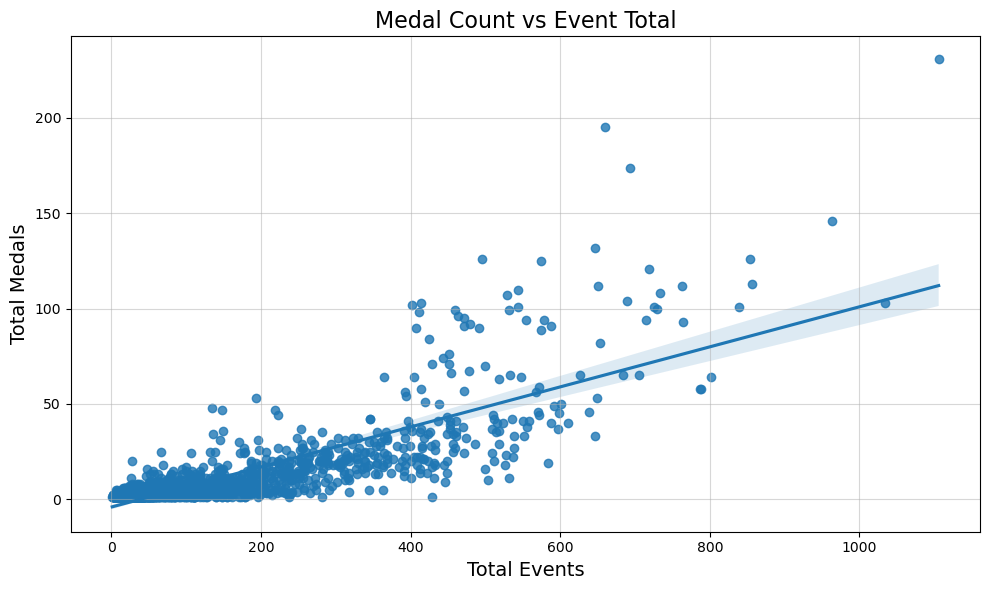

In [77]:
#print(athlete_pivot)
team_to_noc = dict(zip(athletes_data['Team'], athletes_data['NOC']))
pivot_copy = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)
pivot_copy = pivot_copy[matched_columns]
medal_pivot = pivot_copy.rename(columns=team_to_noc)
medal_pivot

# Flatten the athlete_pivot and medal_pivot DataFrames
athlete_flat = athlete_pivot.reset_index().melt(id_vars="Year", var_name="NOC", value_name="Athlete_Count")
medal_flat = medal_pivot.reset_index().melt(id_vars="Year", var_name="NOC", value_name="Medal_Count")

# Merge the two DataFrames on 'Year' and 'NOC'
merged_data = pd.merge(athlete_flat, medal_flat, on=["Year", "NOC"])
merged_data = merged_data.dropna(subset=['Athlete_Count', 'Medal_Count'])
merged_data = merged_data[(merged_data['Athlete_Count'] > 0) & (merged_data['Medal_Count'] > 0)]
#print(merged_data.to_string())

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x="Athlete_Count", y="Medal_Count")

# Add titles and labels
plt.title("Medal Count vs Event Total", fontsize=16)
plt.xlabel("Total Events", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)
plt.grid(alpha=0.5)
#plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

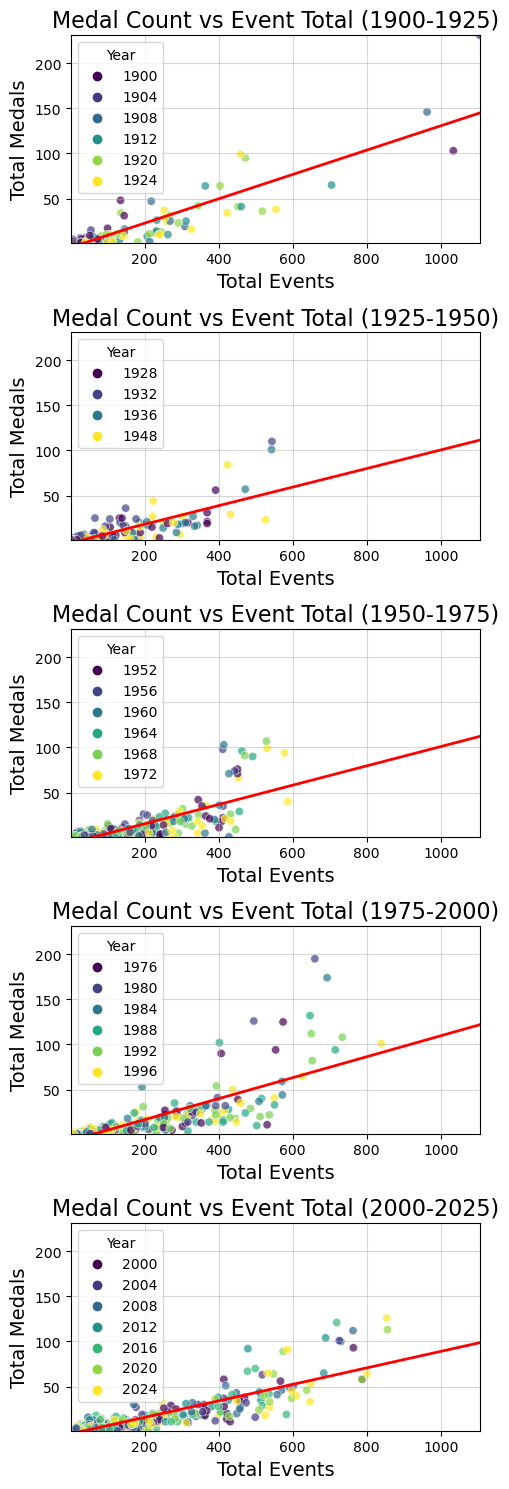

In [40]:
year_ranges = [(1900, 1925), (1925, 1950), (1950, 1975), (1975, 2000), (2000, 2025)]

# Create subplots for each year range
fig, axes = plt.subplots(len(year_ranges), 1, figsize=(5, 3 * len(year_ranges)))

# If only one subplot is generated, make sure axes is a list
if len(year_ranges) == 1:
    axes = [axes]

    
x_min, x_max = merged_data['Athlete_Count'].min(), merged_data['Athlete_Count'].max()
y_min, y_max = merged_data['Medal_Count'].min(), merged_data['Medal_Count'].max()

# Loop over each year range and plot
for i, (start_year, end_year) in enumerate(year_ranges):
    # Filter the data for the current year range
    filtered_data = merged_data[(merged_data['Year'] >= start_year) &
                                              (merged_data['Year'] < end_year)]
    
   # Create the scatterplot for the current range
    sns.scatterplot(data=filtered_data, x="Athlete_Count", y="Medal_Count", hue="Year", palette="viridis", alpha=0.7, ax=axes[i])

    # Fit a linear regression line using scipy's linregress
    slope, intercept, _, _, _ = linregress(filtered_data['Athlete_Count'], filtered_data['Medal_Count'])
    
    # Create the x values to cover the plot range (from x_min to x_max)
    x_vals = [x_min, x_max]
    
    # Calculate the corresponding y values based on the regression line
    y_vals = [slope * x + intercept for x in x_vals]
    
    # Plot the regression line
    axes[i].plot(x_vals, y_vals, color='red', linestyle='-', linewidth=2, label='Best Fit Line')
    
    # Set titles, labels, and axis limits for each plot
    axes[i].set_title(f"Medal Count vs Event Total ({start_year}-{end_year})", fontsize=16)
    axes[i].set_xlabel("Total Events", fontsize=14)
    axes[i].set_ylabel("Total Medals", fontsize=14)
    axes[i].grid(alpha=0.5)
    #axes[i].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set the same axis limits for all plots
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
# Adjust layout for subplots
plt.tight_layout()
plt.show()

Gender

In [82]:
# Step 1: Filter and prepare the data
buffer = athletes_data.copy()

# Ensure Sex column only has 'M' and 'F'
buffer = buffer[buffer['Sex'].isin(['M', 'F'])]

# Step 2: Group by NOC and Year, and calculate total and male athlete counts
grouped_data = buffer.groupby(['NOC', 'Year', 'Sex']).size().reset_index(name='Count')

# Separate male and total counts
male_counts = grouped_data[grouped_data['Sex'] == 'M'].groupby(['NOC', 'Year'])['Count'].sum().reset_index(name='Male_Count')
total_counts = grouped_data.groupby(['NOC', 'Year'])['Count'].sum().reset_index(name='Total_Count')

# Merge male and total counts
merged_counts = pd.merge(male_counts, total_counts, on=['NOC', 'Year'], how='right').fillna(0)

# Calculate the percentage of male athletes
merged_counts['Male_Percentage'] = (merged_counts['Male_Count'] / merged_counts['Total_Count']) * 100

# Step 3: Pivot the table
percentage_table = merged_counts.pivot(index='NOC', columns='Year', values='Male_Percentage').fillna(0)

# Display the pivot table
percentage_table

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
NOC,,,,,,,,,,,,,,,,,,,,,
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,0.000000,100.000000,0.000000,60.000000,75.000000,83.333333,66.666667,80.000000,42.857143
AHO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.000000,75.000000,100.000000,87.500000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
AIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.652174
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,77.777778,33.333333,40.000000,71.428571,58.333333,70.000000,50.000000,60.000000,55.555556
ALG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93.333333,94.444444,87.234043,80.392157,76.056338,61.403509,56.410256,82.432432,66.666667,49.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,100.000000,100.000000,50.000000,100.000000,87.500000,75.000000,66.666667,66.666667,75.000000
YMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YUG,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,...,75.409836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


    Year  Male_Percentage
0   1896       100.000000
1   1900        98.259494
2   1904        98.766384
3   1906        99.362688
4   1908        98.465056
5   1912        97.840119
6   1920        96.876457
7   1924        95.419847
8   1928        91.602234
9   1932        89.249493
10  1936        92.849144
11  1948        90.320533
12  1952        81.891859
13  1956        82.582407
14  1960        82.318876
15  1964        82.498052
16  1968        79.301107
17  1972        78.708738
18  1976        74.861111
19  1980        75.580587
20  1984        74.116776
21  1988        70.560864
22  1992        68.208449
23  1996        63.650886
24  2000        60.703430
25  2004        58.742560
26  2008        57.250000
27  2012        54.988776
28  2016        54.536821
29  2020        51.944444
30  2024        50.896515


C:\Users\conno\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


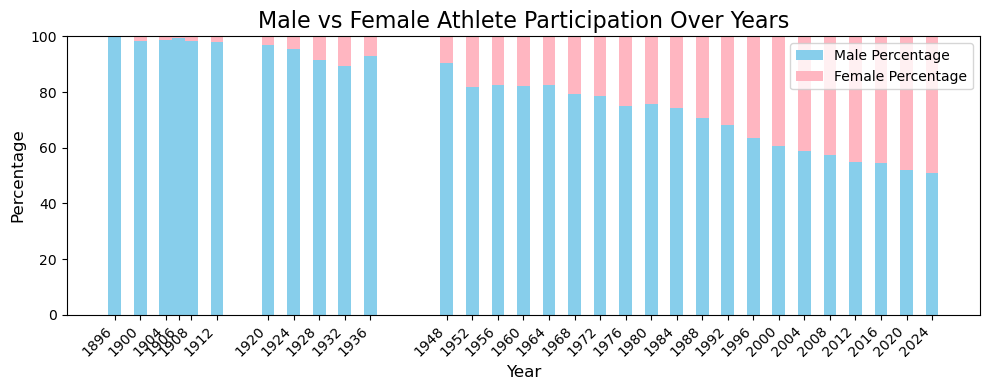

In [92]:
grouped_year_data = buffer.groupby(['Year', 'Sex']).size().reset_index(name='Count')

# Separate male and total counts
male_counts = grouped_year_data[grouped_year_data['Sex'] == 'M'].groupby('Year')['Count'].sum().reset_index(name='Male_Count')
total_counts = grouped_year_data.groupby('Year')['Count'].sum().reset_index(name='Total_Count')

# Merge male and total counts
yearly_counts = pd.merge(male_counts, total_counts, on='Year', how='right').fillna(0)

# Calculate the percentage of male athletes
yearly_counts['Male_Percentage'] = (yearly_counts['Male_Count'] / yearly_counts['Total_Count']) * 100

# Step 3: Create the final table
total_male_percentage_table = yearly_counts[['Year', 'Male_Percentage']]

# Display the table
print(total_male_percentage_table)

# Prepare data for stacked bar chart
total_male_percentage_table['Female_Percentage'] = 100 - total_male_percentage_table['Male_Percentage']
years = total_male_percentage_table['Year']
male_percentage = total_male_percentage_table['Male_Percentage']
female_percentage = total_male_percentage_table['Female_Percentage']

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 4))
width = 2  # Bar width

# Plot male percentage
ax.bar(years, male_percentage, width, label='Male Percentage', color='skyblue')

# Plot female percentage on top of male percentage
ax.bar(years, female_percentage, width, bottom=male_percentage, label='Female Percentage', color='lightpink')

# Add labels, title, and legend
ax.set_title('Male vs Female Athlete Participation Over Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(loc='upper right')
ax.set_xticks(years)  # Ensure all years are displayed
ax.set_xticklabels(years, rotation=45, ha='right')  # Rotate year labels for readability

# Display the plot
plt.tight_layout()
plt.show()

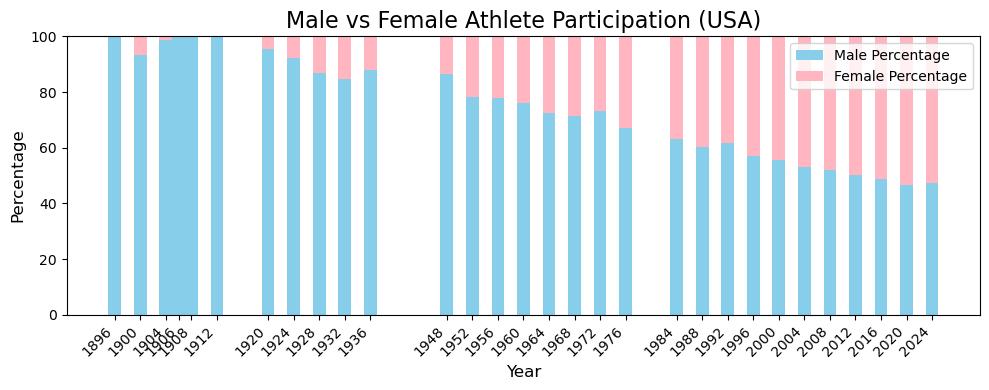

In [96]:
# Step 1: Filter the original buffer for USA
usa_data = buffer[buffer['NOC'] == 'USA']

# Step 2: Group by Year and calculate total and male athlete counts for the USA
usa_grouped_year_data = usa_data.groupby(['Year', 'Sex']).size().reset_index(name='Count')

# Separate male and total counts
usa_male_counts = usa_grouped_year_data[usa_grouped_year_data['Sex'] == 'M'].groupby('Year')['Count'].sum().reset_index(name='Male_Count')
usa_total_counts = usa_grouped_year_data.groupby('Year')['Count'].sum().reset_index(name='Total_Count')

# Merge male and total counts
usa_yearly_counts = pd.merge(usa_male_counts, usa_total_counts, on='Year', how='right').fillna(0)

# Calculate Male Percentage and Female Percentage
usa_yearly_counts['Male_Percentage'] = (usa_yearly_counts['Male_Count'] / usa_yearly_counts['Total_Count']) * 100
usa_yearly_counts['Female_Percentage'] = 100 - usa_yearly_counts['Male_Percentage']

# Extract data for plotting
years = usa_yearly_counts['Year']
male_percentage = usa_yearly_counts['Male_Percentage']
female_percentage = usa_yearly_counts['Female_Percentage']

# Step 3: Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 4))
width = 2  # Bar width

# Plot male percentage
ax.bar(years, male_percentage, width, label='Male Percentage', color='skyblue')

# Plot female percentage on top of male percentage
ax.bar(years, female_percentage, width, bottom=male_percentage, label='Female Percentage', color='lightpink')

# Add labels, title, and legend
ax.set_title('Male vs Female Athlete Participation (USA)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(loc='upper right')
ax.set_xticks(years)  # Ensure all years are displayed
ax.set_xticklabels(years, rotation=45, ha='right')  # Rotate year labels for readability

# Display the plot
plt.tight_layout()
plt.show()


In [149]:
team_to_noc = dict(zip(athletes_data['Team'], athletes_data['NOC']))
pivot_copy = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)
pivot_copy = pivot_copy[matched_columns]
medal_pivot = pivot_copy.rename(columns=team_to_noc)
medal_pivot

# Flatten the athlete_pivot and medal_pivot DataFrames
athlete_flat = athlete_pivot.reset_index().melt(id_vars="Year", var_name="NOC", value_name="Athlete_Count")
medal_flat = medal_pivot.reset_index().melt(id_vars="Year", var_name="NOC", value_name="Medal_Count")
                                            
asd = pd.merge(athlete_flat, medal_flat, on=["Year", "NOC"])
asd = asd[asd['Athlete_Count'] > 0].reset_index(drop=True)
asd

,Year,NOC,Athlete_Count,Medal_Count
0,1936,AFG,16.0,0
1,1948,AFG,22.0,0
2,1956,AFG,12.0,0
3,1960,AFG,16.0,0
4,1964,AFG,8.0,0
...,...,...,...,...
2449,2008,ZIM,16.0,4
2450,2012,ZIM,9.0,0
2451,2016,ZIM,31.0,0
2452,2020,ZIM,5.0,0


In [152]:
grouped_data
male_entries = grouped_data[grouped_data['Sex'] == 'M'].reset_index(drop=True)
male_entries

,NOC,Year,Sex,Count
0,AFG,1936,M,16
1,AFG,1948,M,22
2,AFG,1956,M,12
3,AFG,1960,M,16
4,AFG,1964,M,8
...,...,...,...,...
3204,ZIM,2008,M,8
3205,ZIM,2012,M,4
3206,ZIM,2016,M,9
3207,ZIM,2020,M,4


      NOC  Year Sex  Count  Athlete_Count  Medal_Count  Male_Percentage
0     AFG  1936   M     16           16.0            0       100.000000
1     AFG  1948   M     22           22.0            0       100.000000
2     AFG  1956   M     12           12.0            0       100.000000
3     AFG  1960   M     16           16.0            0       100.000000
4     AFG  1964   M      8            8.0            0       100.000000
...   ...   ...  ..    ...            ...          ...              ...
2446  ZIM  2008   M      8           16.0            4        50.000000
2447  ZIM  2012   M      4            9.0            0        44.444444
2448  ZIM  2016   M      9           31.0            0        29.032258
2449  ZIM  2020   M      4            5.0            0        80.000000
2450  ZIM  2024   M      5            7.0            0        71.428571

[2451 rows x 7 columns]


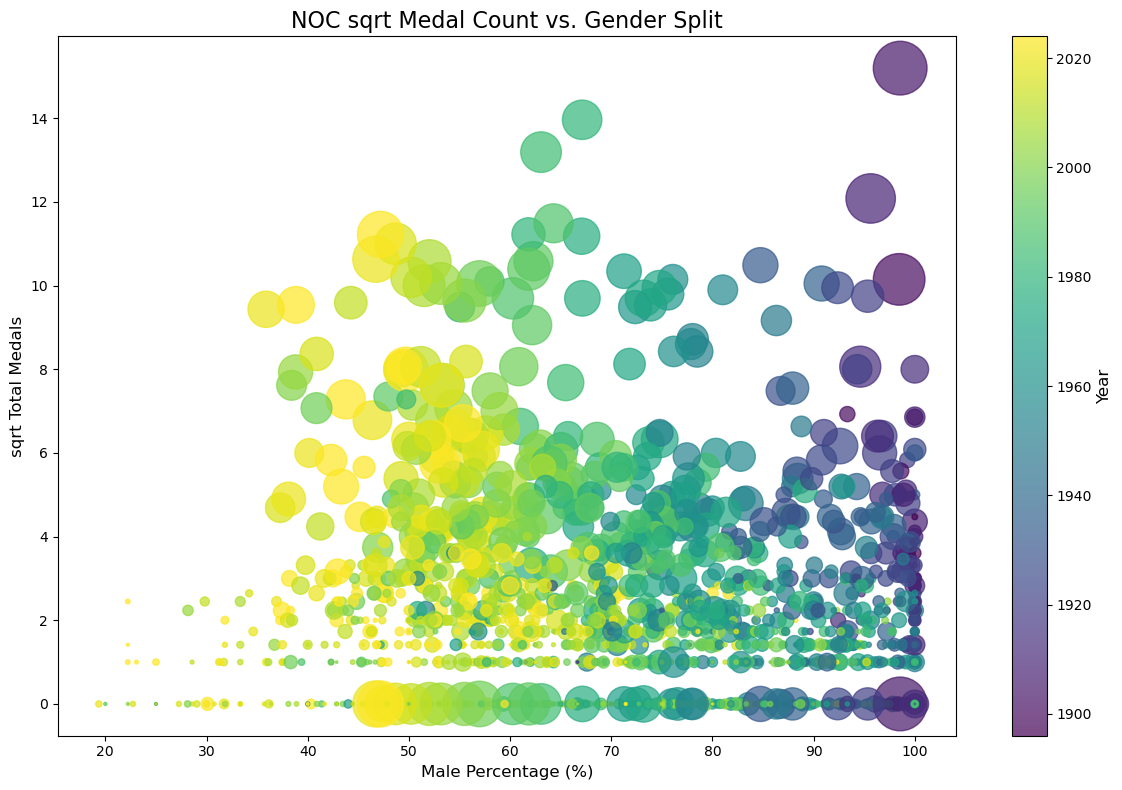

In [349]:
noc_year_data = pd.merge(male_entries, asd, on=['Year', 'NOC'], how='inner')
noc_year_data['Male_Percentage'] = (noc_year_data['Count'] / noc_year_data['Athlete_Count']) * 100
print(noc_year_data)

fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(
    noc_year_data['Male_Percentage'],         # x-axis: Male percentage
    np.sqrt(noc_year_data['Medal_Count']),           # y-axis: Total medals
    s=noc_year_data['Athlete_Count'] ** 1.2/3,   # Bubble size (scaled for visibility)
    c=noc_year_data['Year'],                 # Bubble color (optional, e.g., year or region)
    cmap='viridis',                          # Color map
    alpha=0.7                                # Transparency for better visualization
)

# Step 5: Add labels and title
ax.set_title('NOC sqrt Medal Count vs. Gender Split', fontsize=16)
ax.set_xlabel('Male Percentage (%)', fontsize=12)
ax.set_ylabel('sqrt Total Medals', fontsize=12)

# Add a colorbar to represent the years
cbar = plt.colorbar(scatter)
cbar.set_label('Year', fontsize=12)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

PCA prep

In [353]:
noc_year_data

,NOC,Year,Sex,Count,Athlete_Count,Medal_Count,Male_Percentage
0,AFG,1936,M,16,16.0,0,100.000000
1,AFG,1948,M,22,22.0,0,100.000000
2,AFG,1956,M,12,12.0,0,100.000000
3,AFG,1960,M,16,16.0,0,100.000000
4,AFG,1964,M,8,8.0,0,100.000000
...,...,...,...,...,...,...,...
2446,ZIM,2008,M,8,16.0,4,50.000000
2447,ZIM,2012,M,4,9.0,0,44.444444
2448,ZIM,2016,M,9,31.0,0,29.032258
2449,ZIM,2020,M,4,5.0,0,80.000000


In [385]:
copy = athletes.copy()

medal_mapping = {
    "No medal": 0,
    "Bronze": 1,
    "Silver": 2,
    "Gold": 3
}


copy["Medal"] = copy["Medal"].replace(medal_mapping)

sport_dict = pd.Series(clusters_df.Cluster.values, index=clusters_df.Sporta).to_dict()

copy["Cluster"] = copy["Sport"].map(sport_dict)
collapse_copy = copy.groupby(['NOC', 'Year', 'Sport', 'Event', 'Cluster'], as_index=False)["Medal"].max()

medals = collapse_copy.groupby(['NOC', 'Year', 'Cluster'], as_index=False)['Medal'].sum()
pmedals = medals.pivot_table(index=['NOC', 'Year'], columns='Cluster', values='Medal', aggfunc='sum', fill_value=0)
#print(pmedals.to_string())
#print(pmedals.loc[('USA', 2020)])

Cluster
1.0      0
2.0     29
3.0      4
4.0      3
5.0     11
6.0    147
7.0     16
8.0      0
9.0      7
Name: (USA, 2020), dtype: int64


In [407]:
pca = pd.merge(pmedals, noc_year_data[["NOC", "Year", "Athlete_Count", "Male_Percentage"]], on=['NOC', 'Year'], how='left')
pca = pca.rename(columns={'Athlete_Count': 'Event_Count',
                          1.0: "Cluster1",
                          2.0: "Cluster2",
                          3.0: "Cluster3",
                          4.0: "Cluster4",
                          5.0: "Cluster5",
                          6.0: "Cluster6",
                          7.0: "Cluster7",
                          8.0: "Cluster8",
                          9.0: "Cluster9"
                         })
pca

,NOC,Year,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Event_Count,Male_Percentage
0,AFG,1936,0,0,0,0,0,0,0,0,0,16.0,100.000000
1,AFG,1948,0,0,0,0,0,0,0,0,0,22.0,100.000000
2,AFG,1956,0,0,0,0,0,0,0,0,0,12.0,100.000000
3,AFG,1960,0,0,0,0,0,0,0,0,0,16.0,100.000000
4,AFG,1964,0,0,0,0,0,0,0,0,0,8.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,ZIM,2008,0,0,0,0,0,9,0,0,0,16.0,50.000000
3255,ZIM,2012,0,0,0,0,0,0,0,0,0,9.0,44.444444
3256,ZIM,2016,0,0,0,0,0,0,0,0,0,31.0,29.032258
3257,ZIM,2020,0,0,0,0,0,0,0,0,0,5.0,80.000000


Growth of Clustered Events

In [399]:
programs = pd.read_csv('./summerOly_programs.csv')

programs = programs.fillna(0)
programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1992,1996,2000,2004,2008,2012,2016,2020,2024,2028
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0,325.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0,53.0


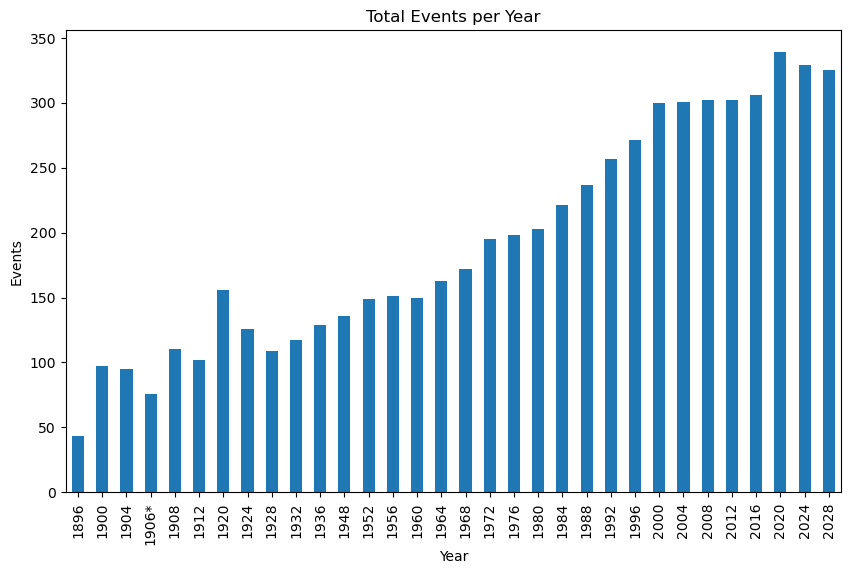

In [416]:
events = programs.iloc[71].drop(programs.columns[:4])
events = pd.to_numeric(events, errors='coerce')

events.plot(kind='bar', figsize=(10, 6))
plt.title('Total Events per Year')
plt.xlabel('Year') 
plt.ylabel('Events')
plt.show()

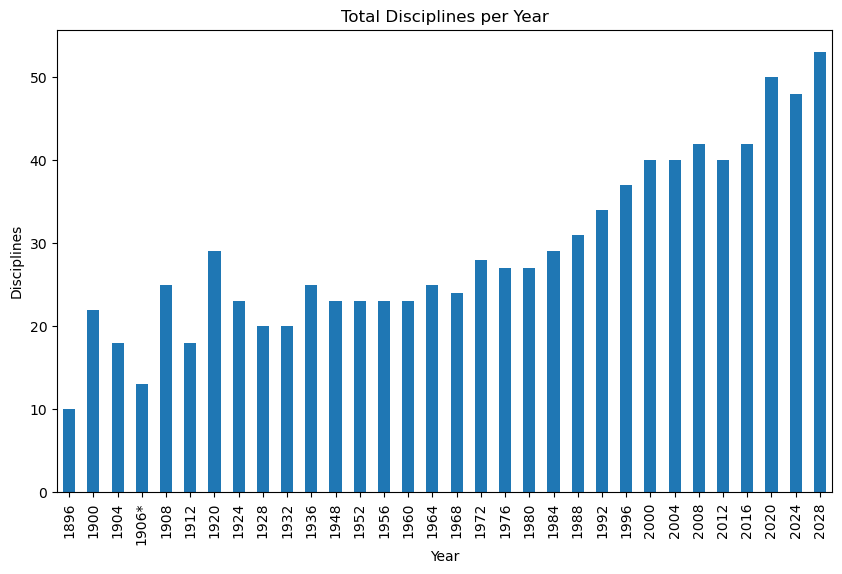

In [417]:
disciplines = programs.iloc[72].drop(programs.columns[:4])
disciplines = pd.to_numeric(disciplines, errors='coerce')

disciplines.plot(kind='bar', figsize=(10, 6))
plt.title('Total Disciplines per Year')
plt.xlabel('Year') 
plt.ylabel('Disciplines')
plt.show()

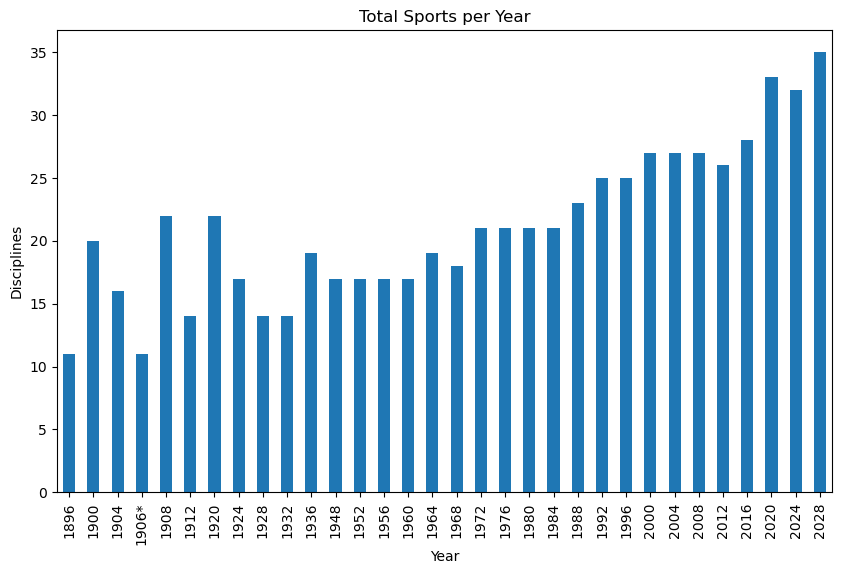

In [421]:
sports = programs.iloc[73].drop(programs.columns[:4])
sports = pd.to_numeric(sports, errors='coerce')

sports.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sports per Year')
plt.xlabel('Year') 
plt.ylabel('Disciplines')
plt.show()

In [452]:
programs_c = programs.copy()
programs_c = programs_c.iloc[0:69]
programs_c["Cluster"] = programs_c["Discipline"].map(sport_dict)
programs_c["Cluster"] = programs_c["Cluster"].fillna(programs_c["Sport"].map(sport_dict))
programs_c = programs_c.dropna(subset=["Cluster"]).reset_index(drop=True)
programs_c = programs_c.replace('�', 0)
programs_c = programs_c.replace('0[s3]', 0)
programs_c = programs_c.apply(pd.to_numeric, errors='ignore')
programs_c = programs_c.rename(columns={"1906*": "1906"})
#print(programs_c["1896"].unique())

   Cluster  1896  1900  1904  1906  1908  1912  1920  1924  1928  ...  1992  \
0      1.0     0     6     1     0     2     0     2     2     0  ...     0   
1      2.0     0     0     0     0     0     0     0     0     0  ...     4   
2      3.0     0     0     1     0     1     0     0     0     0  ...     0   
3      4.0     0     7     6     0     3     0    10     0     0  ...    13   
4      5.0     0     1     2     1     2     4     5     5     4  ...     6   
5      6.0    35    54    72    63    72    77   100    99    88  ...   201   
6      7.0     0     2     2     0     0     0     0     0     0  ...     0   
7      9.0     8    26    10    11    18    20    33    20    16  ...    31   

    1996   2000   2004   2008   2012   2016   2020   2024   2028  
0    0.0    0.0    0.0    0.0    0.0    2.0    2.0    2.0    4.0  
1    6.0    6.0    6.0    8.0    8.0    8.0   16.0   16.0   16.0  
2    1.0    1.0    1.0    1.0    0.0    0.0    1.0    2.0    3.0  
3   14.0   22.0   22

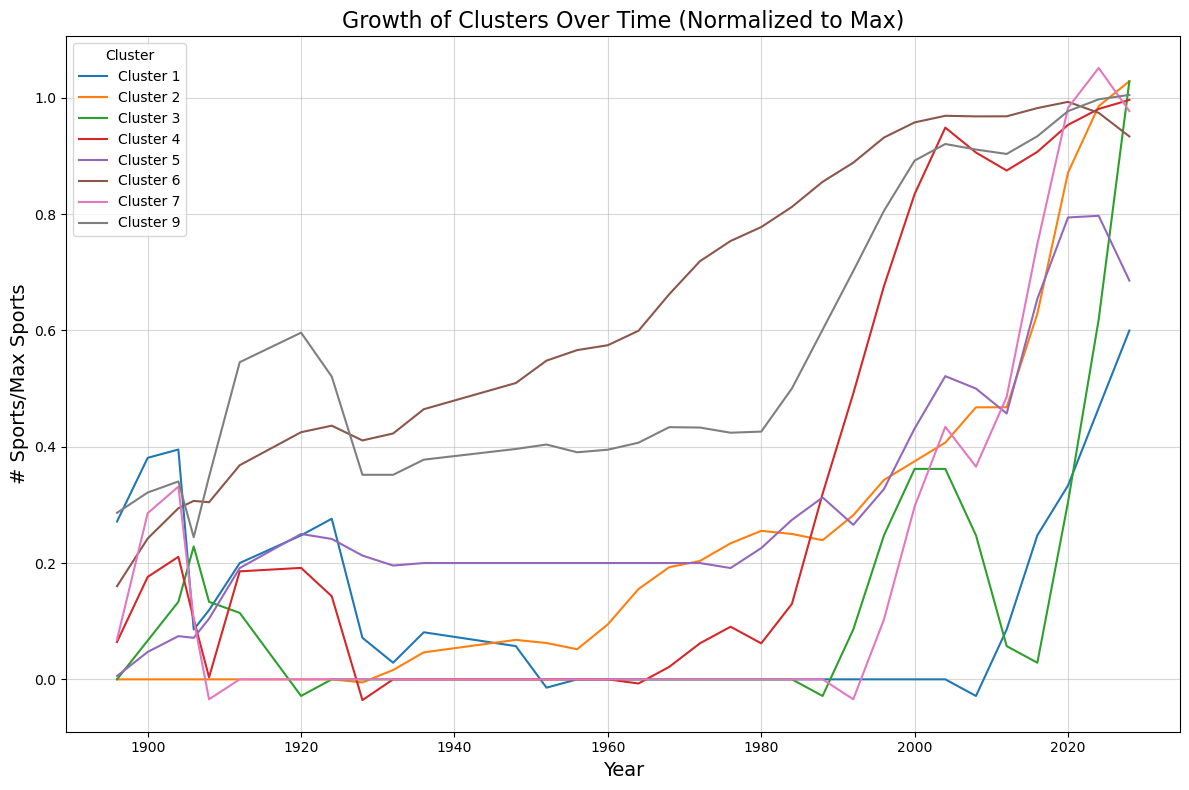

In [457]:
from scipy.signal import savgol_filter

aggregated = programs_c.groupby("Cluster").sum()

# Step 3: Reset the index for the final aggregated DataFrame
aggregated = aggregated.reset_index()

# Print the result
print(aggregated)

n_agg = aggregated.copy()
years = [col for col in n_agg.columns if col not in ["Cluster"]]
n_agg[years] = n_agg[years].div(n_agg[years].max(axis=1), axis=0)


# Plot the growth of each cluster over time
plt.figure(figsize=(12, 8))

for _, row in n_agg.iterrows():
    cluster = int(row["Cluster"])  # Extract cluster number
    x = np.array([int(year) for year in years])  # Convert years to numeric
    y = np.array(row[years])  # Values for the cluster
    
    # Apply Savitzky-Golay filter
    y_smooth = savgol_filter(y, window_length=5, polyorder=2)  # Adjust window and polyorder as needed
    
    plt.plot(x, y_smooth, label=f"Cluster {cluster}")

# Customize the plot
plt.title("Growth of Clusters Over Time (Normalized to Max)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("# Sports/Max Sports", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Cluster", fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [458]:
buffer = pd.read_csv('./summerOly_athletes.csv')
buffer['NOC'] = buffer['NOC'].str.replace('\xa0', '', regex=True)
buffer["Medal"] = buffer["Medal"].str.replace('\xa0', '', regex=True)
buffer['Sport'] = buffer['Sport'].str.split(',', n=1).str[0]

medal_mapping = {
    "No medal": 0,
    "Bronze": 1,
    "Silver": 2,
    "Gold": 3
}

buffer["Medal"] = buffer["Medal"].replace(medal_mapping)
collapsed_data = buffer.groupby(['NOC', 'Year', 'Sport', 'Event'], as_index=False)["Medal"].max()
total_medals_by_noc = collapsed_data.groupby(['NOC','Year'])['Medal'].sum().reset_index()

collapsed_data2 = buffer.groupby(['NOC', 'Year', 'Sport', 'Event'], as_index=False).size()
events_by_noc = collapsed_data2.groupby(['NOC', 'Year'])['size'].count().reset_index(name='Event_Count')

merged1 = pd.merge(total_medals_by_noc, events_by_noc, on=['NOC','Year'], how='left')
merged1

,NOC,Year,Medal,Event_Count
0,AFG,1936,0,4
1,AFG,1948,0,2
2,AFG,1956,0,1
3,AFG,1960,0,13
4,AFG,1964,0,8
...,...,...,...,...
3217,ZIM,2008,9,15
3218,ZIM,2012,0,8
3219,ZIM,2016,0,13
3220,ZIM,2020,0,5
